Ce notebook a pour utilité d'explorer les données du projet.

Le feature engineering effectué ici sera reproduit dans le pipeline pour le déploiement de l'API.

Ce notebook sert également à tester plusieurs modèles sur notre jeu d'entrainement, et à entrainer le modèle final. 



In [2]:
#mise en place de l'environnement Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# importation des données

appli_test = pd.read_csv('application_test.csv', sep = ',')

appli_train = pd.read_csv('application_train.csv', sep = ',')

bureau = pd.read_csv('bureau.csv', sep = ',')

bureau_balance = pd.read_csv('bureau_balance.csv', sep = ',')

credit_card = pd.read_csv('credit_card_balance.csv', sep = ',')

installments = pd.read_csv('installments_payments.csv', sep = ',')

POS = pd.read_csv('POS_CASH_balance.csv', sep = ',')

previous_appli = pd.read_csv('previous_application.csv', sep = ',')

sample = pd.read_csv('sample_submission.csv', sep = ',')

**appli test**

In [3]:
appli_test.shape

(48744, 121)

In [4]:
appli_test.tail()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,-9094.0,-3399,NaN,1,1,1,1,1,0,NaN,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.648575,0.643026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-684.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149,-3015.0,-3003,NaN,1,1,0,1,0,0,Sales staff,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,NaN,0.684596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037,-2681.0,-1504,4.0,1,1,0,1,1,0,NaN,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.733503,0.632770,0.283712,0.1113,0.1364,0.9955,NaN,NaN,0.16,0.1379,0.3333,NaN,NaN,NaN,0.1383,NaN,0.0542,0.1134,0.1415,0.9955,NaN,NaN,0.1611,0.1379,0.3333,NaN,NaN,NaN,0.1441,NaN,0.0574,0.1124,0.1364,0.9955,NaN,NaN,0.16,0.1379,0.3333,NaN,NaN,NaN,0.1408,NaN,0.0554,NaN,block of flats,0.1663,"Stone, brick",No,0.0,0.0,0.0,0.0,-838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,2

**appli train**

In [5]:
appli_train.shape

(307511, 122)

In [6]:
appli_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**bureau**

In [7]:
bureau.shape

(1716428, 17)

In [8]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


**bureau balance**

In [9]:
bureau_balance.shape

(27299925, 3)

In [10]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


**credit card**

In [11]:
credit_card.shape

(3840312, 23)

In [12]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


**installments**

In [13]:
installments.shape

(13605401, 8)

In [14]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


**POS**

In [15]:
POS.shape

(10001358, 8)

In [16]:
POS.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


**previous appli**

In [17]:
previous_appli.shape

(1670214, 37)

In [18]:
previous_appli.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**sample**

In [19]:
sample.shape

(48744, 2)

In [20]:
sample.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


### Supression des doublons

In [21]:
data = [appli_test,appli_train,bureau,bureau_balance,credit_card,installments,POS,previous_appli,sample]

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

for DF in data:
    n = len(DF)
    DF.drop_duplicates(inplace = True)
    print(get_df_name(DF)," : suppressions de ",n-len(DF)," doublon(s).")

appli_test  : suppressions de  0  doublon(s).
appli_train  : suppressions de  0  doublon(s).
bureau  : suppressions de  0  doublon(s).
bureau_balance  : suppressions de  0  doublon(s).
credit_card  : suppressions de  0  doublon(s).
installments  : suppressions de  0  doublon(s).
POS  : suppressions de  0  doublon(s).
previous_appli  : suppressions de  0  doublon(s).
sample  : suppressions de  0  doublon(s).


### Sélection des variables

On cherche à identifier ou construire les variables classiques de la prise de décision en terme de prêt :  

_ Taux d'effort : (loyer + charges - allocations ) / revenus  

_ Disponible par personne : reste à vivre / nbre de personnes du foyer  

_ Reste à vivre : Revenus - charges fixes (crédits, impôts, factures d'électricité, etc)  

_ Taux d'endettement : charges fixes (loyers, crédits en cours, etc) / revenus (salaires, loyers reçus, etc)  

_ Identifier les irrégularités : agios / frais bancaires  

_ Solde moyen du compte dans le mois  

_ Solde min / max  

_ Nombre de jours d'anomalie (nbre de jours "dans le rouge")  



In [22]:
# sélection des variables pertinentes pour les Dataframes "appli"

colonnes_test = ["SK_ID_CURR","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY",
                "CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY",
                "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","DAYS_BIRTH","DAYS_EMPLOYED",
                "CNT_FAM_MEMBERS","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
                "OWN_CAR_AGE","REGION_RATING_CLIENT_W_CITY","ORGANIZATION_TYPE"]
colonnes_train = colonnes_test + ["TARGET"]

appli_test = appli_test[colonnes_test]

appli_train = appli_train[colonnes_train]

In [23]:
# sélection des variables pertinentes pour le Dataframe bureau

colonnes = ["SK_ID_CURR","SK_ID_BUREAU","CREDIT_ACTIVE","CREDIT_DAY_OVERDUE","DAYS_CREDIT_ENDDATE",
           "AMT_CREDIT_MAX_OVERDUE","AMT_CREDIT_SUM_DEBT","AMT_CREDIT_SUM_OVERDUE",
           "CREDIT_TYPE"]

bureau = bureau[colonnes]

In [24]:
# sélection des variables pertinentes pour le Dataframe POS

colonnes = ["SK_ID_PREV","SK_ID_CURR","CNT_INSTALMENT_FUTURE"]

POS = POS[colonnes]

In [25]:
# afin de gagner de la mémoire, on agglomère pour chaque prêt ce qu'il reste à payer 
#(ie : le minimum de la variable CNT_INSTALMENT_FUTURE)

POS = POS.groupby(POS['SK_ID_PREV'], as_index = False).agg( SK_ID_CURR=('SK_ID_CURR', 'first'), 
                                                           CNT_INSTALMENT_FUTURE=('CNT_INSTALMENT_FUTURE',min))

In [26]:
# sélection des variables pertinentes pour le Dataframe credit_card

colonnes = ["SK_ID_PREV","SK_ID_CURR","AMT_BALANCE","AMT_DRAWINGS_CURRENT"]

credit_card = credit_card[colonnes]

In [27]:
credit_card = credit_card.groupby(credit_card['SK_ID_PREV'], as_index = False).agg(SK_ID_CURR=('SK_ID_CURR', 'first'),
                                                                                   AMT_BALANCE_mean=('AMT_BALANCE','mean'),
                                                                                   AMT_BALANCE_min=('AMT_BALANCE',min),
                                                                                   AMT_BALANCE_max=('AMT_BALANCE',max),
                                                                                   AMT_DRAWINGS_CURRENT=('AMT_DRAWINGS_CURRENT','mean'))

In [28]:
# sélection des variables pertinentes pour le Dataframe previous_appli

colonnes = ["SK_ID_PREV","SK_ID_CURR","NAME_CONTRACT_TYPE","AMT_CREDIT","NAME_CONTRACT_STATUS",
           "CODE_REJECT_REASON"]

previous_appli = previous_appli[colonnes]

In [29]:
# sélection des variables pertinentes pour le Dataframe installments

colonnes = ["SK_ID_PREV","SK_ID_CURR","AMT_INSTALMENT","AMT_PAYMENT"]

installments = installments[colonnes]

In [30]:
installments = installments.groupby(installments['SK_ID_PREV'], as_index = False).agg(SK_ID_CURR=('SK_ID_CURR', 'first'),
                                                                                      AMT_INSTALMENT=('AMT_INSTALMENT',sum),
                                                                                      AMT_PAYMENT=('AMT_PAYMENT',sum))

On va maintenant rassembler nos données en un unique DF (en réalité deux DF : test/train). 

In [31]:
data_test = pd.merge(appli_test, bureau,how = "left", on = "SK_ID_CURR")

data_train = pd.merge(appli_train, bureau,how = "left", on = "SK_ID_CURR")

print(len(appli_test["SK_ID_CURR"].unique()) == len(data_test["SK_ID_CURR"].unique()))
print(len(appli_train["SK_ID_CURR"].unique()) == len(data_train["SK_ID_CURR"].unique()))

True
True


In [32]:
data_test = pd.merge(data_test, previous_appli,how = "left", on = "SK_ID_CURR")

data_train = pd.merge(data_train, previous_appli,how = "left", on = "SK_ID_CURR")

print(len(appli_test["SK_ID_CURR"].unique()) == len(data_test["SK_ID_CURR"].unique()))
print(len(appli_train["SK_ID_CURR"].unique()) == len(data_train["SK_ID_CURR"].unique()))

True
True


In [33]:
data_test = pd.merge(data_test, POS,how = "left", on = ["SK_ID_PREV","SK_ID_CURR"])

data_train = pd.merge(data_train, POS,how = "left", on = ["SK_ID_PREV","SK_ID_CURR"])

print(len(appli_test["SK_ID_CURR"].unique()) == len(data_test["SK_ID_CURR"].unique()))
print(len(appli_train["SK_ID_CURR"].unique()) == len(data_train["SK_ID_CURR"].unique()))

True
True


In [34]:
data_test = pd.merge(data_test, installments,how = "left", on = ["SK_ID_PREV","SK_ID_CURR"])

data_train = pd.merge(data_train, installments,how = "left", on = ["SK_ID_PREV","SK_ID_CURR"])

print(len(appli_test["SK_ID_CURR"].unique()) == len(data_test["SK_ID_CURR"].unique()))
print(len(appli_train["SK_ID_CURR"].unique()) == len(data_train["SK_ID_CURR"].unique()))

True
True


In [35]:
data_test = pd.merge(data_test, credit_card,how = "left", on = ["SK_ID_PREV","SK_ID_CURR"])

data_train = pd.merge(data_train, credit_card,how = "left", on = ["SK_ID_PREV","SK_ID_CURR"])

print(len(appli_test["SK_ID_CURR"].unique()) == len(data_test["SK_ID_CURR"].unique()))
print(len(appli_train["SK_ID_CURR"].unique()) == len(data_train["SK_ID_CURR"].unique()))

True
True


In [36]:
data_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OWN_CAR_AGE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_CREDIT_y,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CNT_INSTALMENT_FUTURE,AMT_INSTALMENT,AMT_PAYMENT,AMT_BALANCE_mean,AMT_BALANCE_min,AMT_BALANCE_max,AMT_DRAWINGS_CURRENT
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Single / not married,House / apartment,-9461,-637,1.0,Working,Secondary / secondary special,NaN,2,Business Entity Type 3,1,6158904.0,Closed,0.0,-1038.0,NaN,NaN,0.0,Credit card,1038818.0,Consumer loans,179055.0,Approved,XAP,6.0,219625.695,219625.695,NaN,NaN,NaN,NaN
1,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Single / not married,House / apartment,-9461,-637,1.0,Working,Secondary / secondary special,NaN,2,Business Entity Type 3,1,6158905.0,Closed,0.0,NaN,NaN,0.0,0.0,Credit card,1038818.0,Consumer loans,179055.0,Approved,XAP,6.0,219625.695,219625.695,NaN,NaN,NaN,NaN
2,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Single / not married,House / apartment,-9461,-637,1.0,Working,Secondary / secondary special,NaN,2,Business Entity Type 3,1,6158906.0,Closed,0.0,-1072.0,0.000,0.0,0.0,Consumer credit,1038818.0,Consumer loans,179055.0,Approved,XAP,6.0,219625.695,219625.695,NaN,NaN,NaN,NaN
3,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Single / not married,House / apartment,-9461,-637,1.0,Working,Secondary / secondary special,NaN,2,Business Entity Type 3,1,6158907.0,Closed,0.0,-911.0,3321.000,NaN,0.0,Consumer credit,1038818.0,Consumer loans,179055.0,Approved,XAP,6.0,219625.695,219625.695,NaN,NaN,NaN,NaN
4,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Single / not married,House / apartment,-9461,-637,1.0,Working,Secondary / secondary special,NaN,2,Business Entity Type 3,1,6158908.0,Closed,0.0,85.0,5043.645,0.0,0.0,Consumer credit,1038818.0,Consumer loans,179055.0,Approved,XAP,6.0,219625.695,219625.695,NaN,NaN,NaN,NaN


### Features engineering  



In [37]:
# on commence par renommer les variables afin qu'il n'y ait pas d'ambiguïté

names = {'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR',
        'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
        'AMT_CREDIT_x':'AMT_CREDIT_CURR',
        'AMT_CREDIT_y':'AMT_CREDIT_PREV'}

data_train.rename(columns = names, inplace = True)

data_test.rename(columns = names, inplace = True)



In [38]:
# on va maintenant rassembler les lignes entre elles pour que chaque ligne corresponde à une demande de crédit actuelle

data_train = data_train.groupby(data_train['SK_ID_CURR'], as_index = False).agg(NAME_CONTRACT_TYPE_CURR=('NAME_CONTRACT_TYPE_CURR', 'first'),
                                                                                CODE_GENDER=('CODE_GENDER','first'),
                                                                                FLAG_OWN_CAR=('FLAG_OWN_CAR','first'),
                                                                                FLAG_OWN_REALTY=('FLAG_OWN_REALTY','first'),
                                                                                CNT_CHILDREN=('CNT_CHILDREN','first'),
                                                                                AMT_INCOME_TOTAL=('AMT_INCOME_TOTAL','first'),
                                                                                AMT_CREDIT_CURR=('AMT_CREDIT_CURR','first'),
                                                                                AMT_ANNUITY=('AMT_ANNUITY','first'),
                                                                                NAME_FAMILY_STATUS=('NAME_FAMILY_STATUS','first'),
                                                                                NAME_HOUSING_TYPE=('NAME_HOUSING_TYPE','first'),
                                                                                DAYS_BIRTH=('DAYS_BIRTH','first'),
                                                                                DAYS_EMPLOYED=('DAYS_EMPLOYED','first'),
                                                                                CNT_FAM_MEMBERS=('CNT_FAM_MEMBERS','first'),
                                                                                NAME_INCOME_TYPE=('NAME_INCOME_TYPE','first'),
                                                                                NAME_EDUCATION_TYPE=('NAME_EDUCATION_TYPE','first'),
                                                                                OWN_CAR_AGE=("OWN_CAR_AGE",'first'),
                                                                                REGION_RATING_CLIENT_W_CITY=('REGION_RATING_CLIENT_W_CITY','first'),
                                                                                ORGANIZATION_TYPE=("ORGANIZATION_TYPE","first"),
                                                                                TARGET=('TARGET','first'),
                                                                                SK_ID_BUREAU=('SK_ID_BUREAU','first'),
                                                                                CREDIT_ACTIVE=('CREDIT_ACTIVE',list),
                                                                                CREDIT_DAY_OVERDUE=('CREDIT_DAY_OVERDUE','max'),
                                                                                DAYS_CREDIT_ENDDATE=('DAYS_CREDIT_ENDDATE','max'),
                                                                                AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE','max'),
                                                                                AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT',sum),
                                                                                CREDIT_TYPE=('CREDIT_TYPE',set),
                                                                                SK_ID_PREV=('SK_ID_PREV','first'),
                                                                                NAME_CONTRACT_TYPE_PREV=('NAME_CONTRACT_TYPE_PREV','first'),
                                                                                AMT_CREDIT_PREV=('AMT_CREDIT_PREV','first'),
                                                                                NAME_CONTRACT_STATUS=('NAME_CONTRACT_STATUS','first'),
                                                                                CODE_REJECT_REASON=('CODE_REJECT_REASON','first'),
                                                                                CNT_INSTALMENT_FUTURE=('CNT_INSTALMENT_FUTURE',set),
                                                                                AMT_INSTALMENT=('AMT_INSTALMENT',set),
                                                                                AMT_PAYMENT=('AMT_PAYMENT',set),
                                                                                AMT_BALANCE_mean=('AMT_BALANCE_mean','mean'),
                                                                                AMT_BALANCE_min=('AMT_BALANCE_min',min),
                                                                                AMT_BALANCE_max=('AMT_BALANCE_max',max),
                                                                                AMT_DRAWINGS_CURRENT=('AMT_DRAWINGS_CURRENT','mean'))



In [39]:
data_test = data_test.groupby(data_test['SK_ID_CURR'], as_index = False).agg(NAME_CONTRACT_TYPE_CURR=('NAME_CONTRACT_TYPE_CURR', 'first'),
                                                                                CODE_GENDER=('CODE_GENDER','first'),
                                                                                FLAG_OWN_CAR=('FLAG_OWN_CAR','first'),
                                                                                FLAG_OWN_REALTY=('FLAG_OWN_REALTY','first'),
                                                                                CNT_CHILDREN=('CNT_CHILDREN','first'),
                                                                                AMT_INCOME_TOTAL=('AMT_INCOME_TOTAL','first'),
                                                                                AMT_CREDIT_CURR=('AMT_CREDIT_CURR','first'),
                                                                                AMT_ANNUITY=('AMT_ANNUITY','first'),
                                                                                NAME_FAMILY_STATUS=('NAME_FAMILY_STATUS','first'),
                                                                                NAME_HOUSING_TYPE=('NAME_HOUSING_TYPE','first'),
                                                                                DAYS_BIRTH=('DAYS_BIRTH','first'),
                                                                                DAYS_EMPLOYED=('DAYS_EMPLOYED','first'),
                                                                                CNT_FAM_MEMBERS=('CNT_FAM_MEMBERS','first'),
                                                                                NAME_INCOME_TYPE=('NAME_INCOME_TYPE','first'),
                                                                                NAME_EDUCATION_TYPE=('NAME_EDUCATION_TYPE','first'),
                                                                                OWN_CAR_AGE=("OWN_CAR_AGE",'first'),
                                                                                REGION_RATING_CLIENT_W_CITY=('REGION_RATING_CLIENT_W_CITY','first'),
                                                                                ORGANIZATION_TYPE=("ORGANIZATION_TYPE","first"),
                                                                                SK_ID_BUREAU=('SK_ID_BUREAU','first'),
                                                                                CREDIT_ACTIVE=('CREDIT_ACTIVE',list),
                                                                                CREDIT_DAY_OVERDUE=('CREDIT_DAY_OVERDUE','max'),
                                                                                DAYS_CREDIT_ENDDATE=('DAYS_CREDIT_ENDDATE','max'),
                                                                                AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE','max'),
                                                                                AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT',sum),
                                                                                CREDIT_TYPE=('CREDIT_TYPE',set),
                                                                                SK_ID_PREV=('SK_ID_PREV','first'),
                                                                                NAME_CONTRACT_TYPE_PREV=('NAME_CONTRACT_TYPE_PREV','first'),
                                                                                AMT_CREDIT_PREV=('AMT_CREDIT_PREV','first'),
                                                                                NAME_CONTRACT_STATUS=('NAME_CONTRACT_STATUS','first'),
                                                                                CODE_REJECT_REASON=('CODE_REJECT_REASON','first'),
                                                                                CNT_INSTALMENT_FUTURE=('CNT_INSTALMENT_FUTURE',set),
                                                                                AMT_INSTALMENT=('AMT_INSTALMENT',set),
                                                                                AMT_PAYMENT=('AMT_PAYMENT',set),
                                                                                AMT_BALANCE_mean=('AMT_BALANCE_mean','mean'),
                                                                                AMT_BALANCE_min=('AMT_BALANCE_min',min),
                                                                                AMT_BALANCE_max=('AMT_BALANCE_max',max),
                                                                                AMT_DRAWINGS_CURRENT=('AMT_DRAWINGS_CURRENT','mean'))

In [40]:
# transformation de certaines colonnes en binaire

data_test["FLAG_OWN_CAR"][data_test["FLAG_OWN_CAR"]=='N']=0
data_test["FLAG_OWN_CAR"][data_test["FLAG_OWN_CAR"]=='Y']=1

data_train["FLAG_OWN_CAR"][data_train["FLAG_OWN_CAR"]=='N']=0
data_train["FLAG_OWN_CAR"][data_train["FLAG_OWN_CAR"]=='Y']=1


data_test["FLAG_OWN_REALTY"][data_test["FLAG_OWN_REALTY"]=='N']=0
data_test["FLAG_OWN_REALTY"][data_test["FLAG_OWN_REALTY"]=='Y']=1

data_train["FLAG_OWN_REALTY"][data_train["FLAG_OWN_REALTY"]=='N']=0
data_train["FLAG_OWN_REALTY"][data_train["FLAG_OWN_REALTY"]=='Y']=1

<ipython-input-40-a090417f1ac4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["FLAG_OWN_CAR"][data_test["FLAG_OWN_CAR"]=='N']=0
<ipython-input-40-a090417f1ac4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["FLAG_OWN_CAR"][data_test["FLAG_OWN_CAR"]=='Y']=1
<ipython-input-40-a090417f1ac4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["FLAG_OWN_CAR"][data_train["FLAG_OWN_CAR"]=='N']=0
<ipython-input

In [41]:
# on récupère l'âge du client à partir de la variable DAYS_BIRTH

data_test["AGE"] = abs(data_test["DAYS_BIRTH"])//365.25

data_train["AGE"] = abs(data_train["DAYS_BIRTH"])//365.25

data_test.drop(labels = 'DAYS_BIRTH', axis=1, inplace = True)
data_train.drop(labels = 'DAYS_BIRTH', axis=1, inplace = True)

In [42]:
# on garde le nombre de jours travaillés, mais en valeur absolue

data_test["DAYS_EMPLOYED"] = abs(data_test["DAYS_EMPLOYED"])

data_train["DAYS_EMPLOYED"] = abs(data_train["DAYS_EMPLOYED"])

In [43]:
# on transforme la variable CREDIT_ACTIVE pour qu'elle donne le nombre de crédits qu'a contracté le client, et combien sont encore actifs

data_test["AMT_CREDITS"] = data_test["CREDIT_ACTIVE"].str.len()
data_train["AMT_CREDITS"] = data_train["CREDIT_ACTIVE"].str.len()

liste = []
for i in range(len(data_test)):
    liste += [data_test["CREDIT_ACTIVE"].iloc[i].count("Active")]
data_test["AMT_CREDIT_ACTIVE"] = liste

liste = []
for i in range(len(data_train)):
    liste += [data_train["CREDIT_ACTIVE"].iloc[i].count("Active")]
data_train["AMT_CREDIT_ACTIVE"] = liste

data_test.drop(labels = 'CREDIT_ACTIVE', axis=1, inplace = True)
data_train.drop(labels = 'CREDIT_ACTIVE', axis=1, inplace = True)

In [44]:
# pour les crédits terminés, on remplace la valeur de la variable DAYS_CREDIT_ENDDATE par 0

data_test["DAYS_CREDIT_ENDDATE"][data_test["DAYS_CREDIT_ENDDATE"] <= 0]=0
data_train["DAYS_CREDIT_ENDDATE"][data_train["DAYS_CREDIT_ENDDATE"] <= 0]=0

<ipython-input-44-5a4807967e18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["DAYS_CREDIT_ENDDATE"][data_test["DAYS_CREDIT_ENDDATE"] <= 0]=0
<ipython-input-44-5a4807967e18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["DAYS_CREDIT_ENDDATE"][data_train["DAYS_CREDIT_ENDDATE"] <= 0]=0


In [45]:
# on s'intéresse aux différents types de crédits qui ont été contracté en amont par le client

data_test["NB_CREDIT_TYPE"] = data_test["CREDIT_TYPE"].str.len()
data_train["NB_CREDIT_TYPE"] = data_train["CREDIT_TYPE"].str.len()

In [46]:
# on convertie la variable NAME_CONTRACT_STATUS en binaire (1 si le crédit a été approuvé, 0 sinon)

data_test["NAME_CONTRACT_STATUS"][data_test["NAME_CONTRACT_STATUS"] != 'Approved']=0
data_train["NAME_CONTRACT_STATUS"][data_train["NAME_CONTRACT_STATUS"] != 'Approved']=0

data_test["NAME_CONTRACT_STATUS"][data_test["NAME_CONTRACT_STATUS"] == 'Approved']=1
data_train["NAME_CONTRACT_STATUS"][data_train["NAME_CONTRACT_STATUS"] == 'Approved']=1

<ipython-input-46-d9bd5d81cf8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["NAME_CONTRACT_STATUS"][data_test["NAME_CONTRACT_STATUS"] != 'Approved']=0
<ipython-input-46-d9bd5d81cf8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["NAME_CONTRACT_STATUS"][data_train["NAME_CONTRACT_STATUS"] != 'Approved']=0
<ipython-input-46-d9bd5d81cf8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["NAME_CONTRACT

In [47]:
# création d'une fonction de détection des valeurs manquantes

def is_nan(x):
    return (x != x)

In [48]:
#on traite les variables liées aux versements (le nombre restant, la valeur payée, la valeur dûe)

liste = []
for i in range(len(data_test)):
    liste += [sum(x for x in data_test["CNT_INSTALMENT_FUTURE"].iloc[i] if is_nan(x)==False)]
data_test["CNT_INSTALMENT_FUTURE"] = liste

liste = []
for i in range(len(data_train)):
    liste += [sum(x for x in data_train["CNT_INSTALMENT_FUTURE"].iloc[i] if is_nan(x)==False)]
data_train["CNT_INSTALMENT_FUTURE"] = liste

liste = []
for i in range(len(data_test)):
    liste += [sum(x for x in data_test["AMT_INSTALMENT"].iloc[i] if is_nan(x)==False)]
data_test["AMT_INSTALMENT"] = liste

liste = []
for i in range(len(data_train)):
    liste += [sum(x for x in data_train["AMT_INSTALMENT"].iloc[i] if is_nan(x)==False)]
data_train["AMT_INSTALMENT"] = liste

liste = []
for i in range(len(data_test)):
    liste += [sum(x for x in data_test["AMT_PAYMENT"].iloc[i] if is_nan(x)==False)]
data_test["AMT_PAYMENT"] = liste

liste = []
for i in range(len(data_train)):
    liste += [sum(x for x in data_train["AMT_PAYMENT"].iloc[i] if is_nan(x)==False)]
data_train["AMT_PAYMENT"] = liste

In [49]:
# on créé une variable donnant le reste à payer du versement du crédit précédent

data_test["AMT_REST_TO_PAY"] = data_test["AMT_INSTALMENT"] - data_test["AMT_PAYMENT"]
data_train["AMT_REST_TO_PAY"] = data_train["AMT_INSTALMENT"] - data_train["AMT_PAYMENT"]

In [50]:
data_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OWN_CAR_AGE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TARGET,SK_ID_BUREAU,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,CREDIT_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_CREDIT_PREV,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CNT_INSTALMENT_FUTURE,AMT_INSTALMENT,AMT_PAYMENT,AMT_BALANCE_mean,AMT_BALANCE_min,AMT_BALANCE_max,AMT_DRAWINGS_CURRENT,AGE,AMT_CREDITS,AMT_CREDIT_ACTIVE,NB_CREDIT_TYPE,AMT_REST_TO_PAY
0,100002,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,Single / not married,House / apartment,637,1.0,Working,Secondary / secondary special,NaN,2,Business Entity Type 3,1,6158904.0,0.0,780.0,5043.645,245781.0,"{Consumer credit, Credit card}",1038818.0,Consumer loans,179055.0,1,XAP,6.0,219625.695,219625.695,NaN,NaN,NaN,NaN,25,8,2,2,0.000
1,100003,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,Married,House / apartment,1188,2.0,State servant,Higher education,NaN,1,School,0,5885877.0,0.0,1216.0,0.000,0.0,"{Consumer credit, Credit card}",1810518.0,Cash loans,1035882.0,1,XAP,1.0,1618864.650,1618864.650,NaN,NaN,NaN,NaN,45,12,3,2,0.000
2,100004,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,Single / not married,House / apartment,225,1.0,Working,Secondary / secondary special,26.0,2,Government,0,6829133.0,0.0,0.0,0.000,0.0,{Consumer credit},1564014.0,Consumer loans,20106.0,1,XAP,0.0,21288.465,21288.465,NaN,NaN,NaN,NaN,52,2,0,1,0.000
3,100006,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,Civil marriage,House / apartment,3039,2.0,Working,Secondary / secondary special,NaN,2,Business Entity Type 3,0,NaN,NaN,NaN,NaN,0.0,{nan},2078043.0,Cash loans,675000.0,1,XAP,3.0,1007153.415,1007153.415,0.0,0.0,0.0,0.0,52,9,0,1,0.000
4,100007,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,Single / not married,House / apartment,3038,1.0,Working,Secondary / secondary special,NaN,2,Religion,0,5987200.0,0.0,0.0,0.000,0.0,{Consumer credit},2001242.0,Cash loans,180000.0,1,XAP,14.0,835985.340,806127.975,NaN,NaN,NaN,NaN,54,6,0,1,29857.365


### Analyse des valeurs manquantes

<AxesSubplot:>

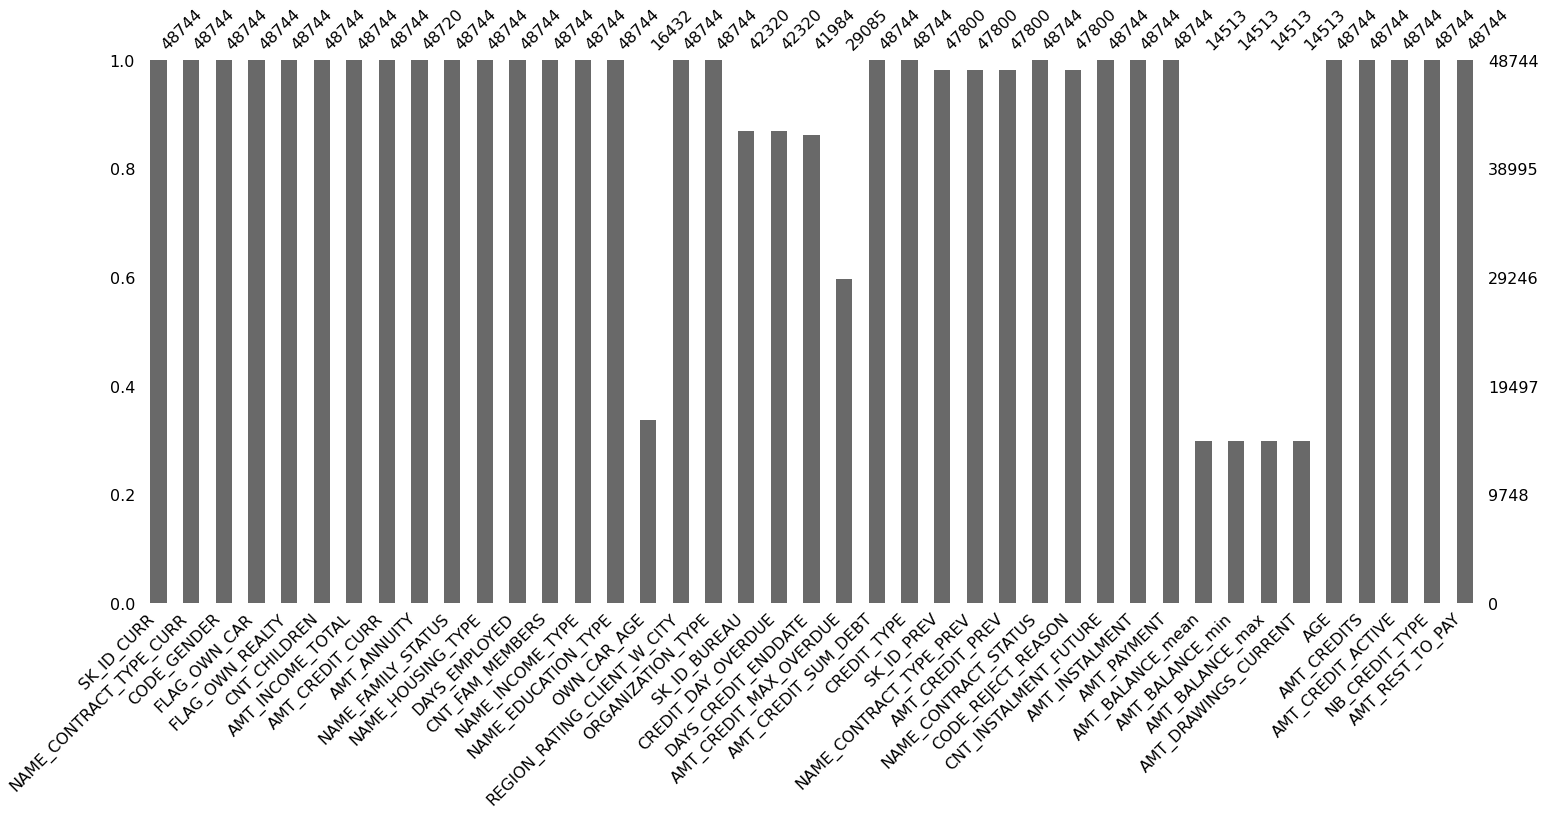

In [51]:
import missingno as msno


msno.bar(data_test)

<AxesSubplot:>

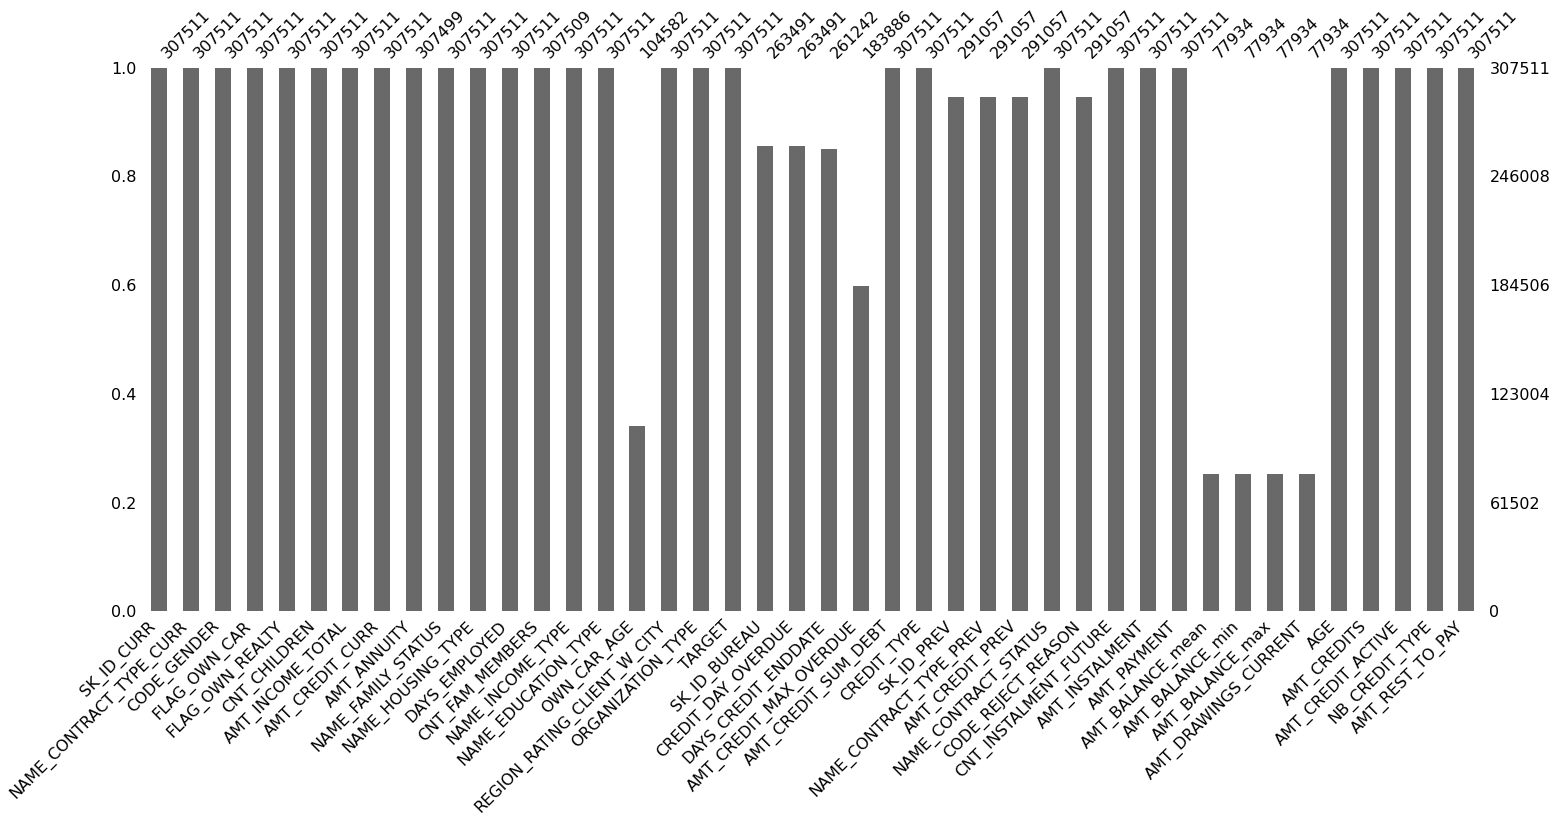

In [52]:
msno.bar(data_train)

In [53]:
# on comble les Nan des variables les moins remplies, lorsque ça a du sens

colonnes = ["CREDIT_DAY_OVERDUE","DAYS_CREDIT_ENDDATE","AMT_CREDIT_MAX_OVERDUE",]

for col in colonnes:
    data_test[col][is_nan(data_test[col])]=0
    data_train[col][is_nan(data_train[col])]=0

<ipython-input-53-acf4d0e61d37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[col][is_nan(data_test[col])]=0
<ipython-input-53-acf4d0e61d37>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[col][is_nan(data_train[col])]=0
<ipython-input-53-acf4d0e61d37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[col][is_nan(data_test[col])]=0
<ipython-input-53-acf4d0e61d37>:7: SettingWithCopyWarning: 
A value is 

In [54]:
#on se sépare de certaines variables trop vides:

liste = ['AMT_BALANCE_mean', 'AMT_BALANCE_min','AMT_BALANCE_max', 'AMT_DRAWINGS_CURRENT',"OWN_CAR_AGE"]

data_test.drop(labels = liste, axis=1, inplace = True)
data_train.drop(labels = liste, axis=1, inplace = True)

In [55]:
# enfin, on supprime les entrées restantes qui contiennent des Nan:

data_test.dropna(inplace = True)
data_train.dropna(inplace = True)

<AxesSubplot:>

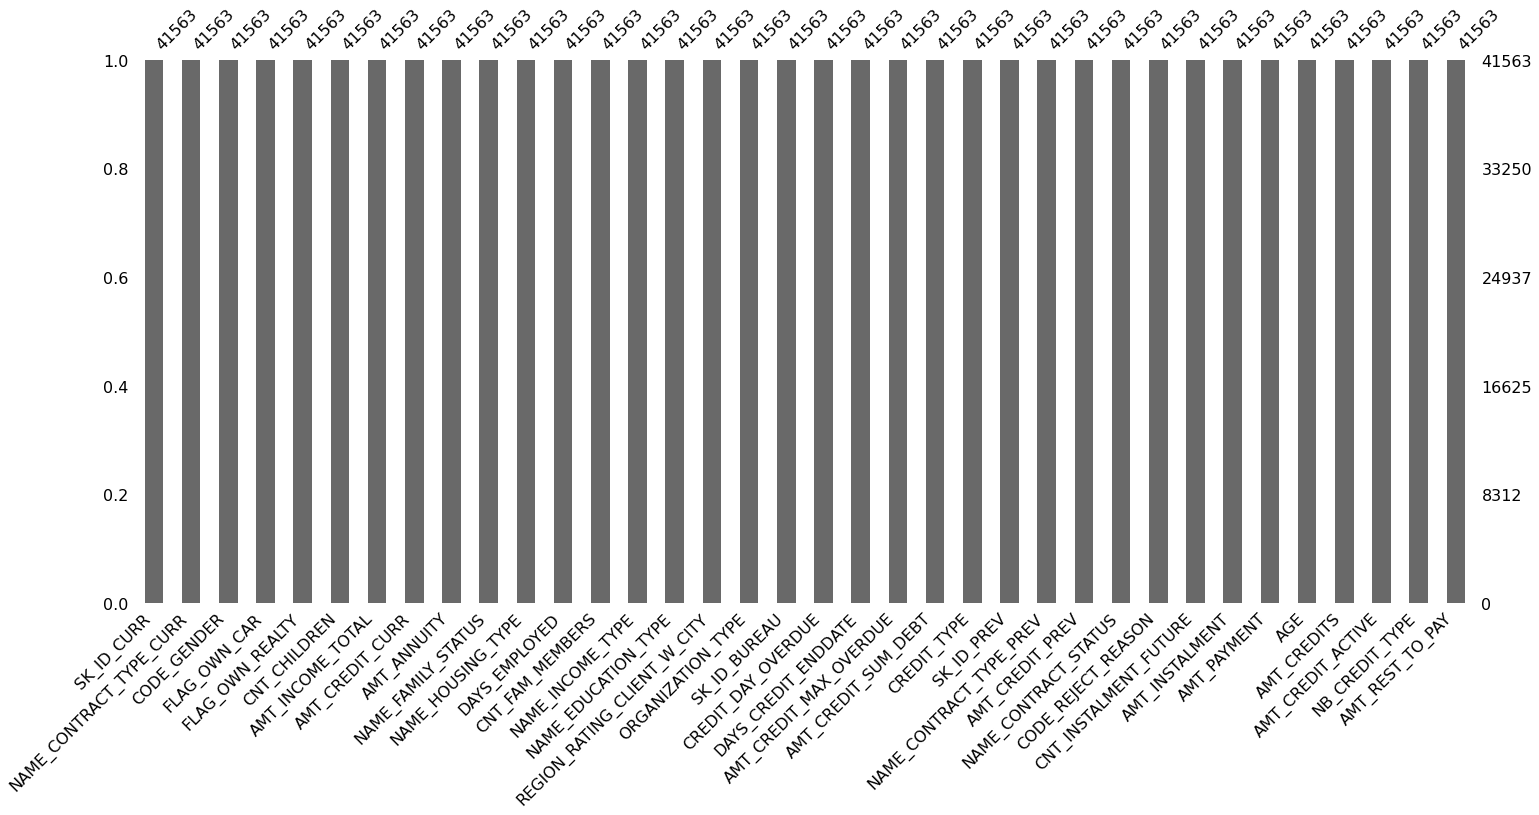

In [56]:
msno.bar(data_test)

<AxesSubplot:>

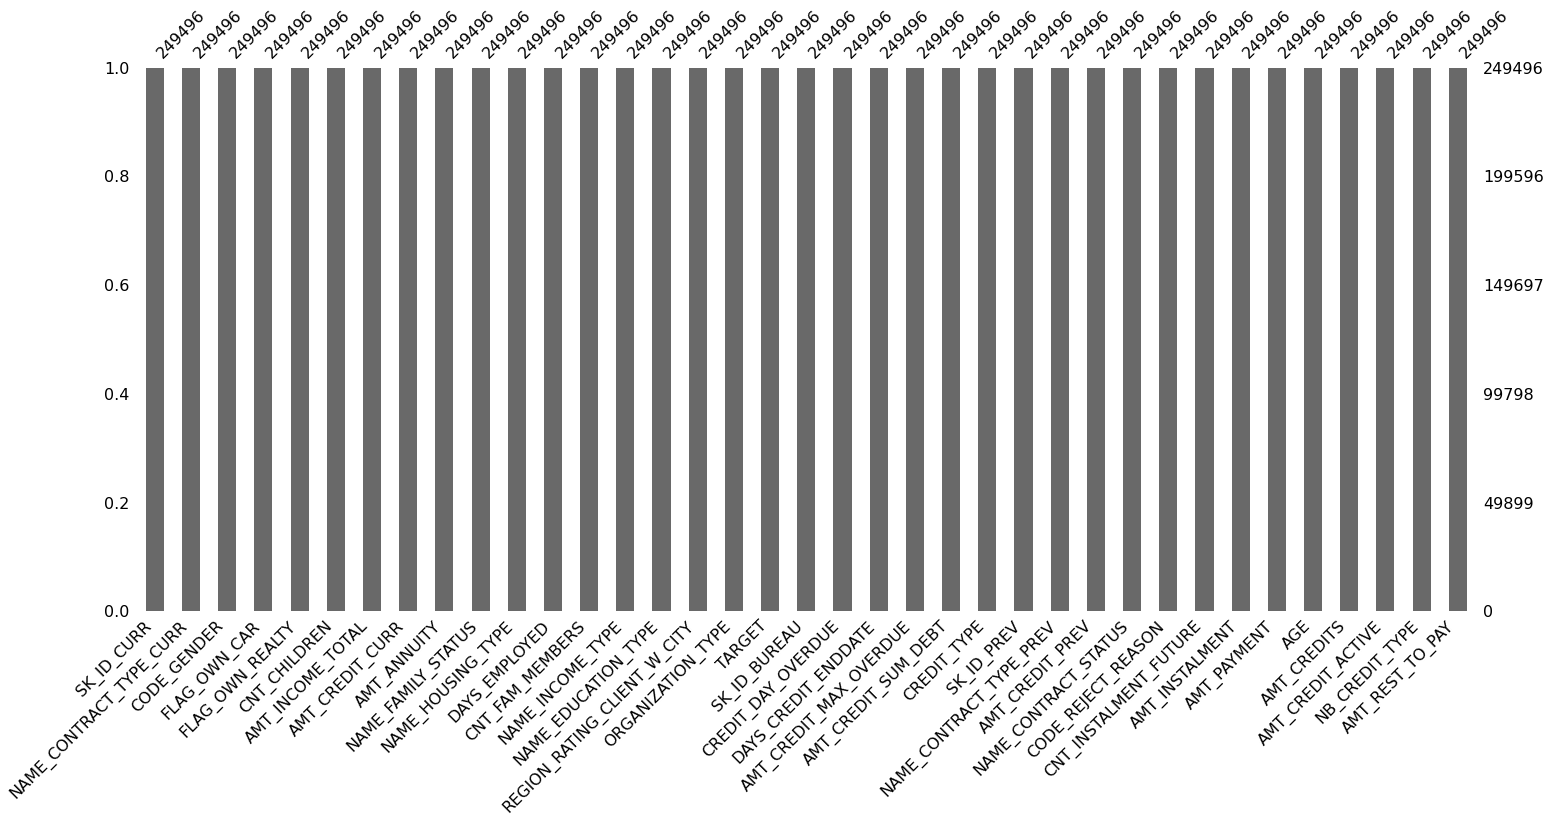

In [57]:
msno.bar(data_train)

### Analyse des variables

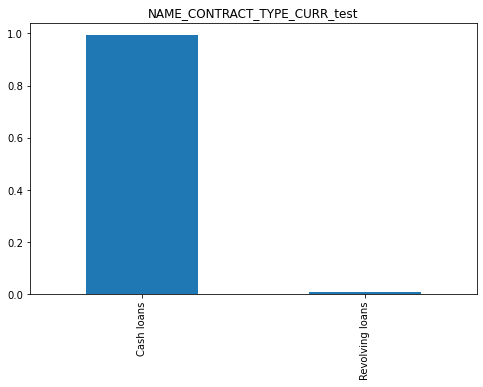

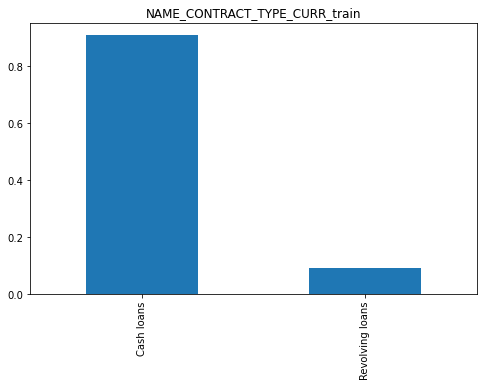

In [58]:
plt.figure(figsize=(8,5))
data_test["NAME_CONTRACT_TYPE_CURR"].value_counts(normalize=True).plot(kind='bar',title='NAME_CONTRACT_TYPE_CURR_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train["NAME_CONTRACT_TYPE_CURR"].value_counts(normalize=True).plot(kind='bar',title='NAME_CONTRACT_TYPE_CURR_train')
plt.show() 

In [59]:
# cette variable ne semblant pas essentielle, on peut s'en séparer. 

data_test.drop(labels = "NAME_CONTRACT_TYPE_CURR", axis=1, inplace = True)
data_train.drop(labels = "NAME_CONTRACT_TYPE_CURR", axis=1, inplace = True)

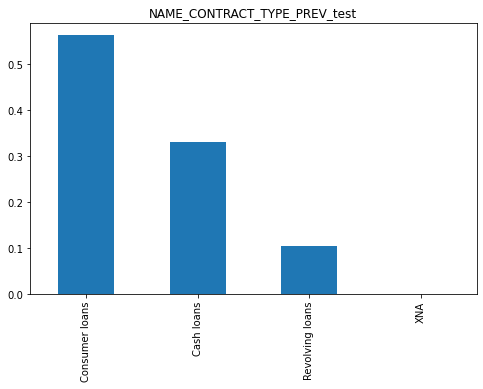

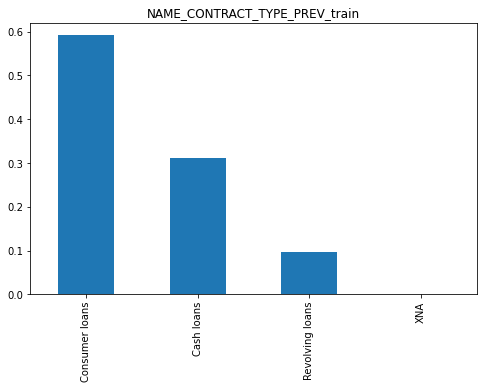

In [60]:
plt.figure(figsize=(8,5))
data_test["NAME_CONTRACT_TYPE_PREV"].value_counts(normalize=True).plot(kind='bar',title='NAME_CONTRACT_TYPE_PREV_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train["NAME_CONTRACT_TYPE_PREV"].value_counts(normalize=True).plot(kind='bar',title='NAME_CONTRACT_TYPE_PREV_train')
plt.show() 

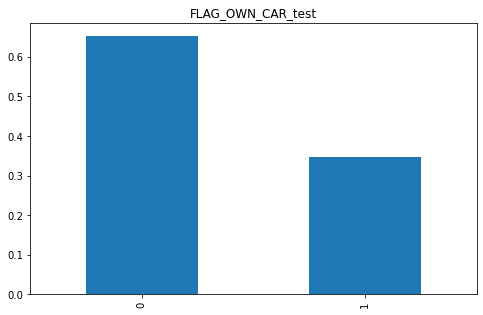

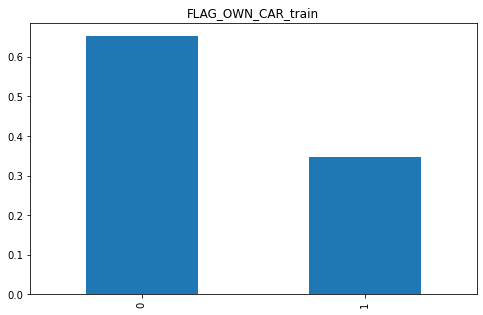

In [61]:
plt.figure(figsize=(8,5))
data_test["FLAG_OWN_CAR"].value_counts(normalize=True).plot(kind='bar',title='FLAG_OWN_CAR_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train['FLAG_OWN_CAR'].value_counts(normalize=True).plot(kind='bar',title='FLAG_OWN_CAR_train')
plt.show() 

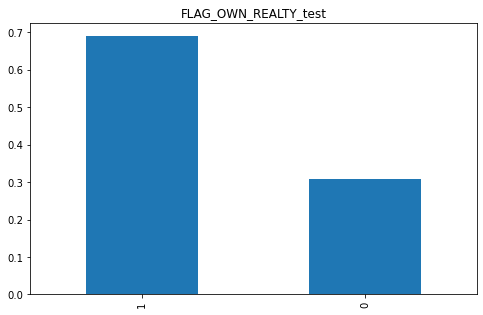

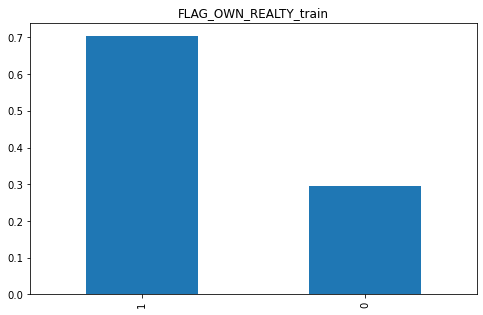

In [62]:
plt.figure(figsize=(8,5))
data_test['FLAG_OWN_REALTY'].value_counts(normalize=True).plot(kind='bar',title='FLAG_OWN_REALTY_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train["FLAG_OWN_REALTY"].value_counts(normalize=True).plot(kind='bar',title='FLAG_OWN_REALTY_train')
plt.show() 

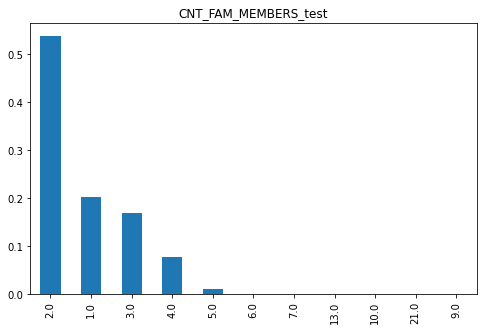

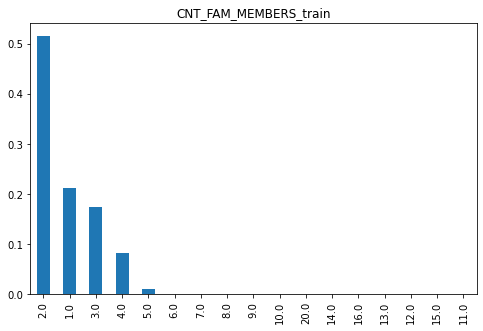

In [63]:
plt.figure(figsize=(8,5))
data_test['CNT_FAM_MEMBERS'].value_counts(normalize=True).plot(kind='bar',title='CNT_FAM_MEMBERS_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train["CNT_FAM_MEMBERS"].value_counts(normalize=True).plot(kind='bar',title='CNT_FAM_MEMBERS_train')
plt.show() 

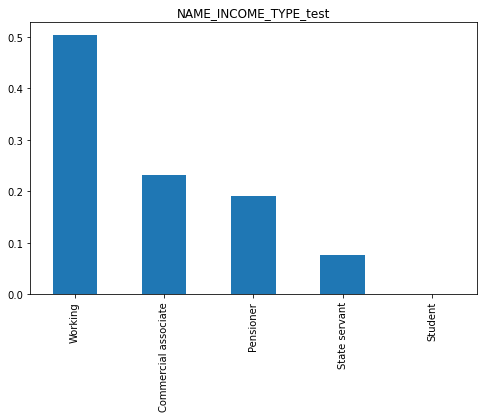

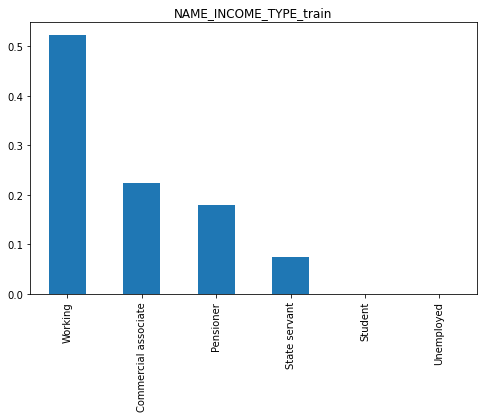

In [64]:
plt.figure(figsize=(8,5))
data_test['NAME_INCOME_TYPE'].value_counts(normalize=True).plot(kind='bar',title='NAME_INCOME_TYPE_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train['NAME_INCOME_TYPE'].value_counts(normalize=True).plot(kind='bar',title='NAME_INCOME_TYPE_train')
plt.show() 

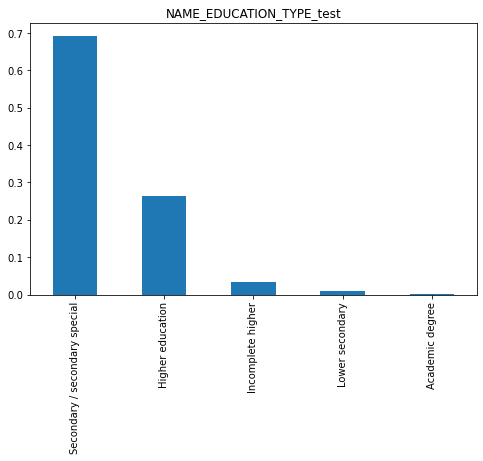

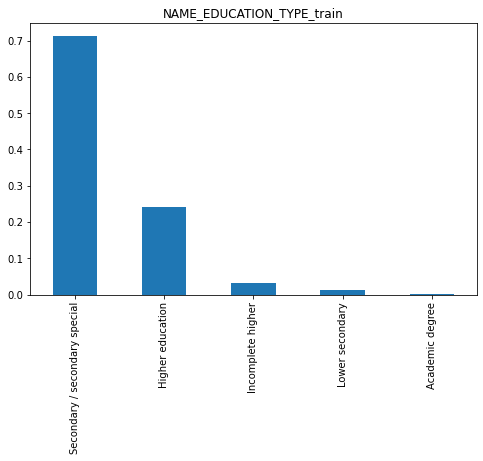

In [65]:
plt.figure(figsize=(8,5))
data_test['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot(kind='bar',title='NAME_EDUCATION_TYPE_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot(kind='bar',title='NAME_EDUCATION_TYPE_train')
plt.show() 

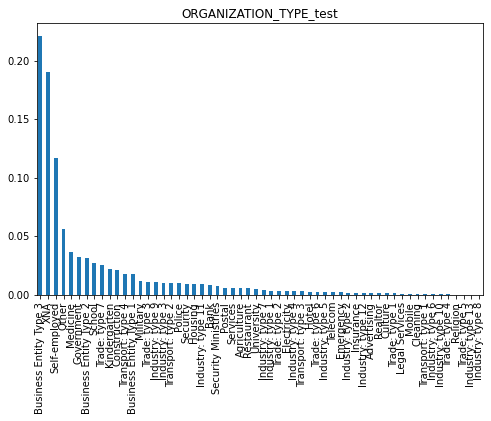

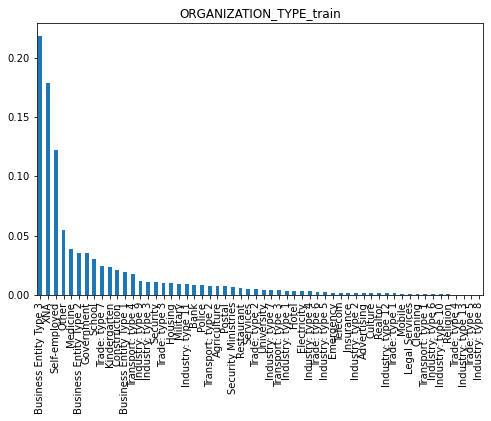

In [66]:
plt.figure(figsize=(8,5))
data_test['ORGANIZATION_TYPE'].value_counts(normalize=True).plot(kind='bar',title='ORGANIZATION_TYPE_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train['ORGANIZATION_TYPE'].value_counts(normalize=True).plot(kind='bar',title='ORGANIZATION_TYPE_train')
plt.show() 

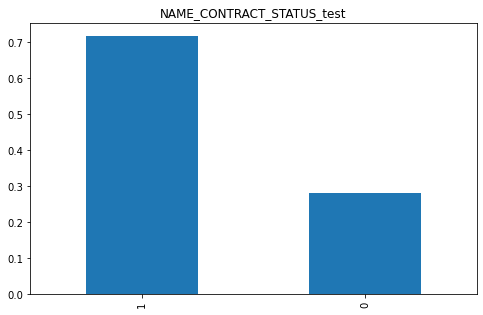

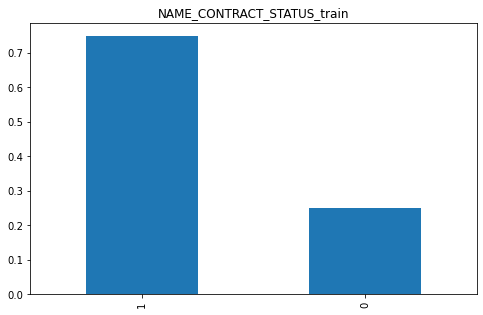

In [67]:
plt.figure(figsize=(8,5))
data_test['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot(kind='bar',title='NAME_CONTRACT_STATUS_test')
plt.show() 
plt.figure(figsize=(8,5))
data_train['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot(kind='bar',title='NAME_CONTRACT_STATUS_train')
plt.show() 

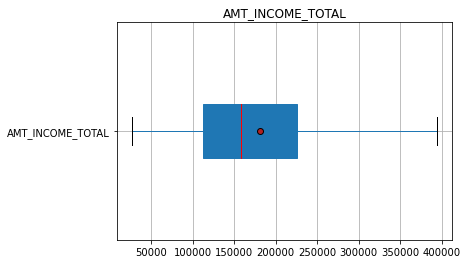

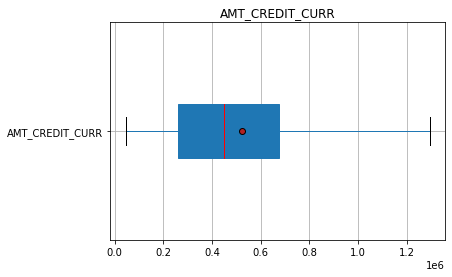

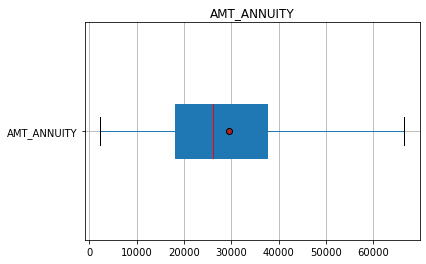

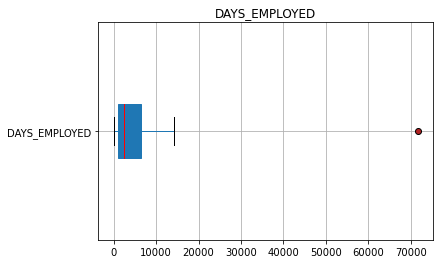

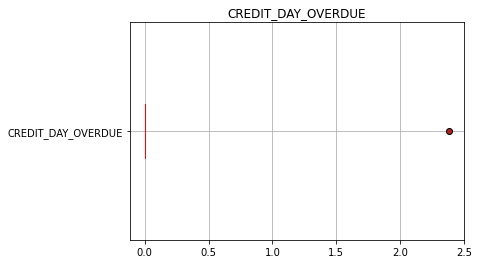

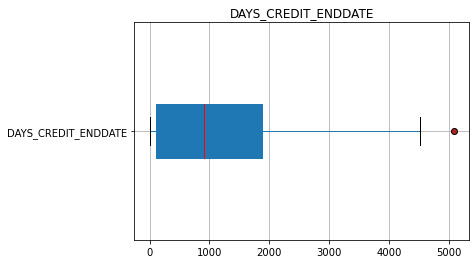

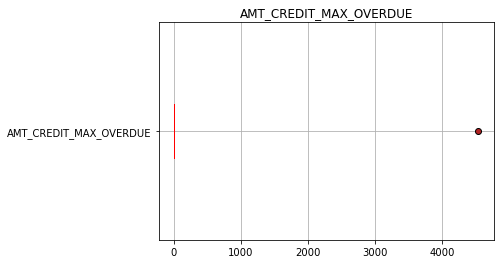

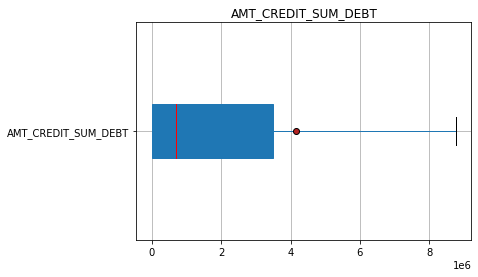

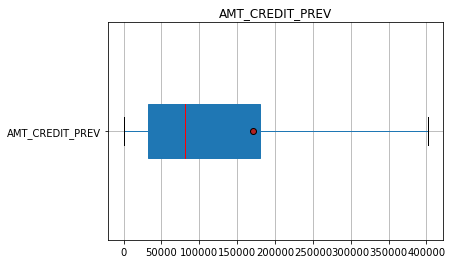

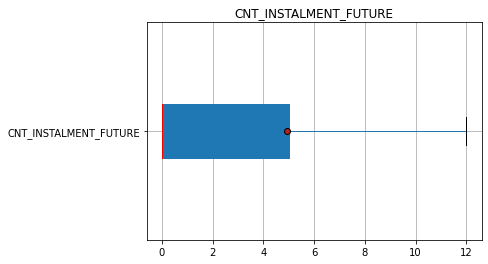

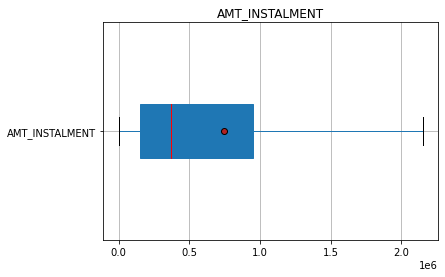

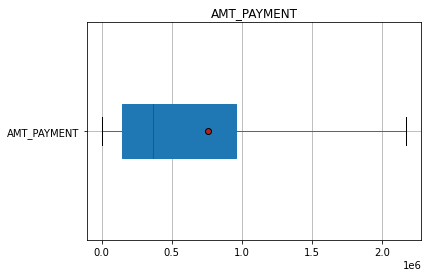

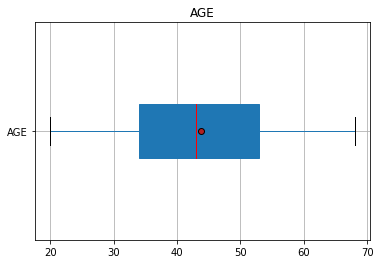

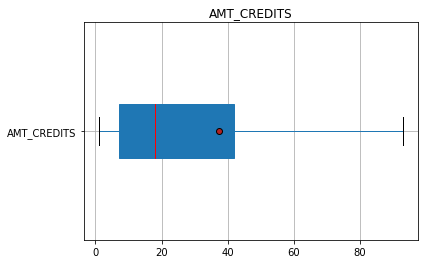

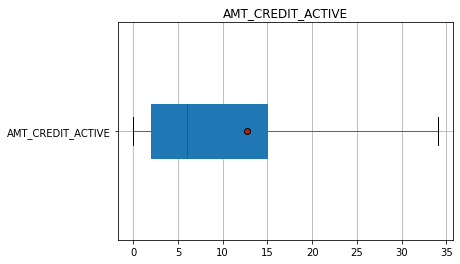

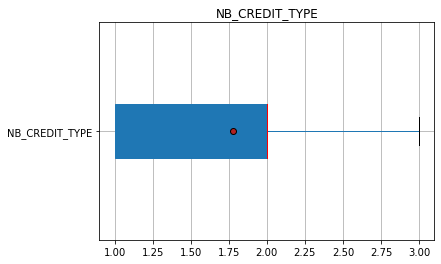

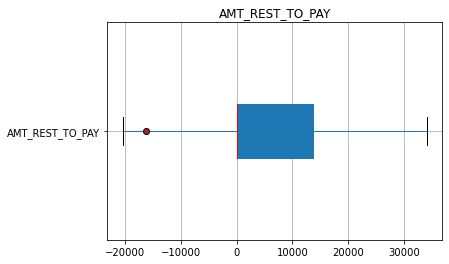

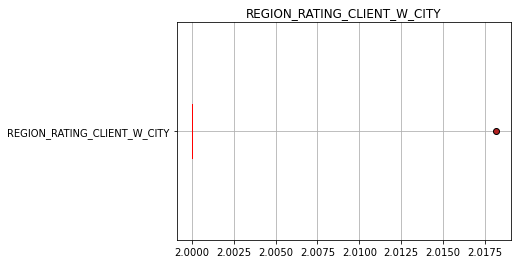

In [68]:
# affichage des boites à moustache de ces variables :

colonnes = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR', 'AMT_ANNUITY',
       'DAYS_EMPLOYED',  'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT',
         'AMT_CREDIT_PREV',
        'CNT_INSTALMENT_FUTURE',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'AGE', 'AMT_CREDITS',
       'AMT_CREDIT_ACTIVE', 'NB_CREDIT_TYPE', 'AMT_REST_TO_PAY','REGION_RATING_CLIENT_W_CITY']

# mise en place du style
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

  
for colonne in colonnes :
    data_test.boxplot(column = colonne, showfliers=False, patch_artist=True, medianprops = medianprops,  vert = False,  showmeans=True ,  widths = 0.25, meanprops=meanprops)
    plt.title(colonne)
    plt.show()


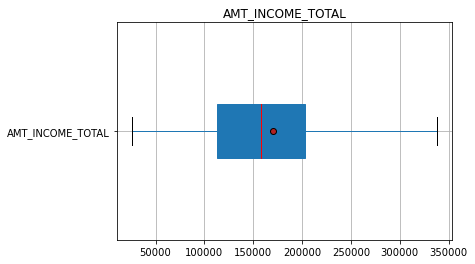

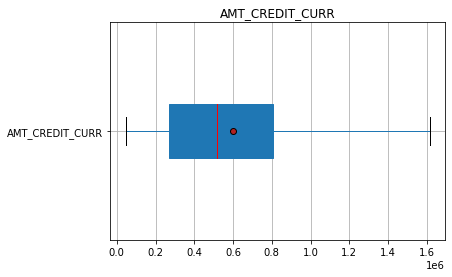

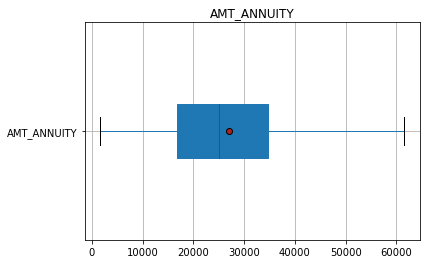

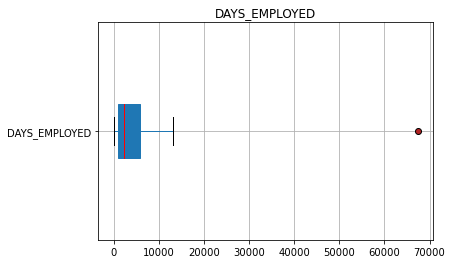

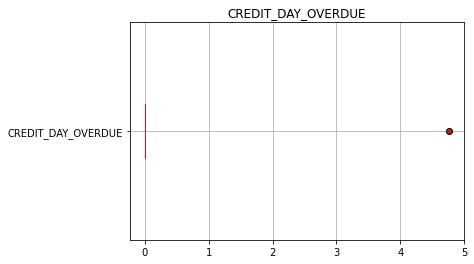

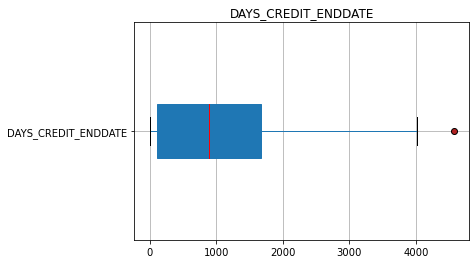

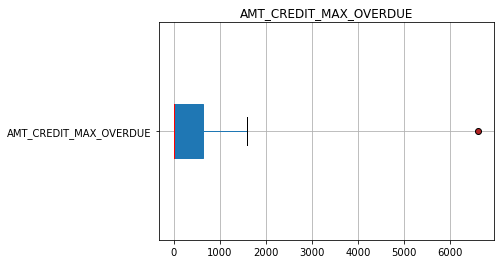

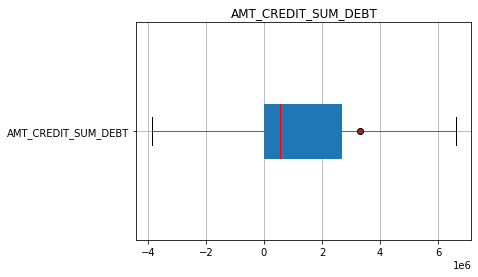

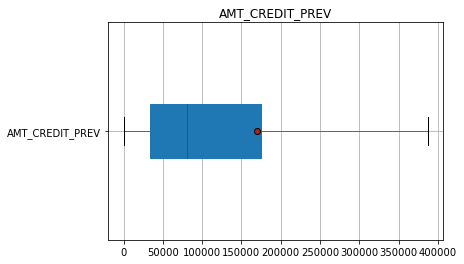

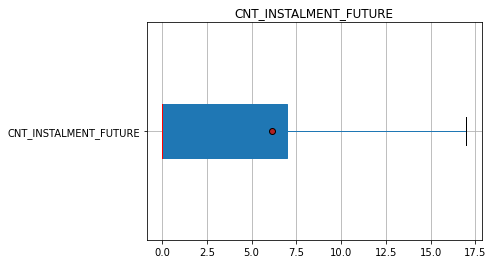

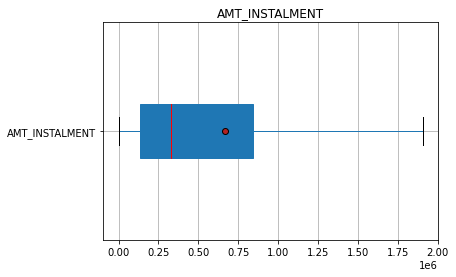

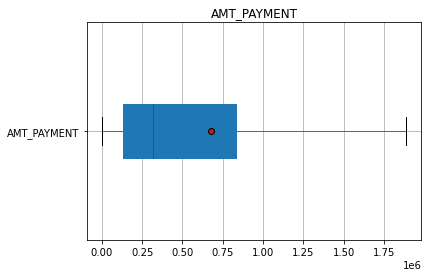

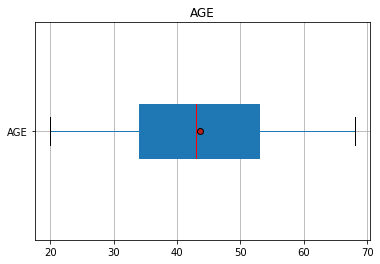

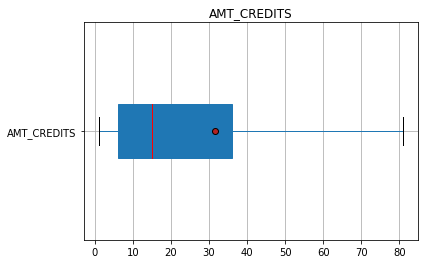

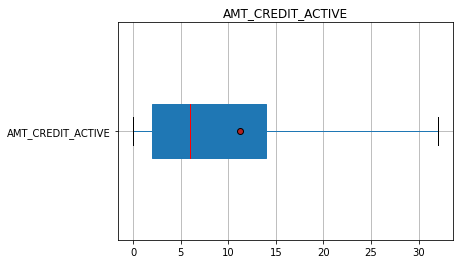

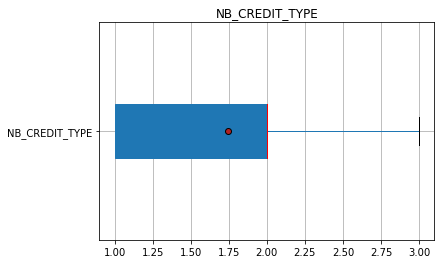

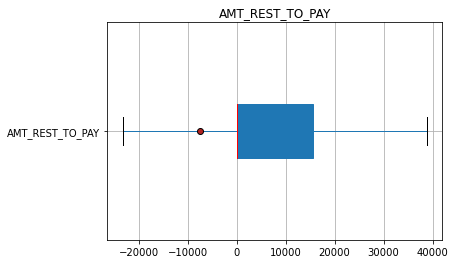

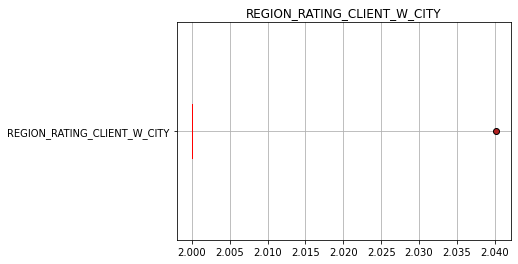

In [69]:
# affichage des boites à moustache de ces variables :

colonnes = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR', 'AMT_ANNUITY',
       'DAYS_EMPLOYED',  'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT',
         'AMT_CREDIT_PREV',
        'CNT_INSTALMENT_FUTURE',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'AGE', 'AMT_CREDITS',
       'AMT_CREDIT_ACTIVE', 'NB_CREDIT_TYPE', 'AMT_REST_TO_PAY','REGION_RATING_CLIENT_W_CITY']

# mise en place du style
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

  
for colonne in colonnes :
    data_train.boxplot(column = colonne, showfliers=False, patch_artist=True, medianprops = medianprops,  vert = False,  showmeans=True ,  widths = 0.25, meanprops=meanprops)
    plt.title(colonne)
    plt.show()

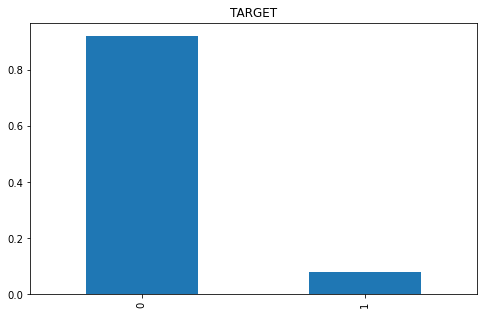

In [70]:
plt.figure(figsize=(8,5))
data_train['TARGET'].value_counts(normalize=True).plot(kind='bar',title='TARGET')
plt.show() 

Il faudra avoir recours à SMOTE pour obtenir plus d'entrées avec la valeur 1 (prêts refusés). 

### Correction de valeurs aberrantes:

In [71]:
# on ne peut avoir un reste à payer négatif
data_test["AMT_REST_TO_PAY"][data_test["AMT_REST_TO_PAY"]<0]=0
data_train["AMT_REST_TO_PAY"][data_train["AMT_REST_TO_PAY"]<0]=0

# on va considérer que l'age limite est 100 ans
data_test = data_test[data_test["AGE"]<=100]
data_train = data_train[data_train["AGE"]<=100]

# on considère qu'on ne travaille pas plus de 18 250 jours (environ 50 ans)
data_test = data_test[data_test['DAYS_EMPLOYED']<=18250]
data_train = data_train[data_train['DAYS_EMPLOYED']<=18250]

# on supprime les valeurs XNA dans les variables catégorielles:
for col in ['CODE_GENDER','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 
             'ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_PREV']:
    data_test = data_test[~(data_test[col]=='XNA')]
    data_train = data_train[~(data_train[col]=='XNA')]

<ipython-input-71-35a8b6498233>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["AMT_REST_TO_PAY"][data_test["AMT_REST_TO_PAY"]<0]=0
<ipython-input-71-35a8b6498233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["AMT_REST_TO_PAY"][data_train["AMT_REST_TO_PAY"]<0]=0


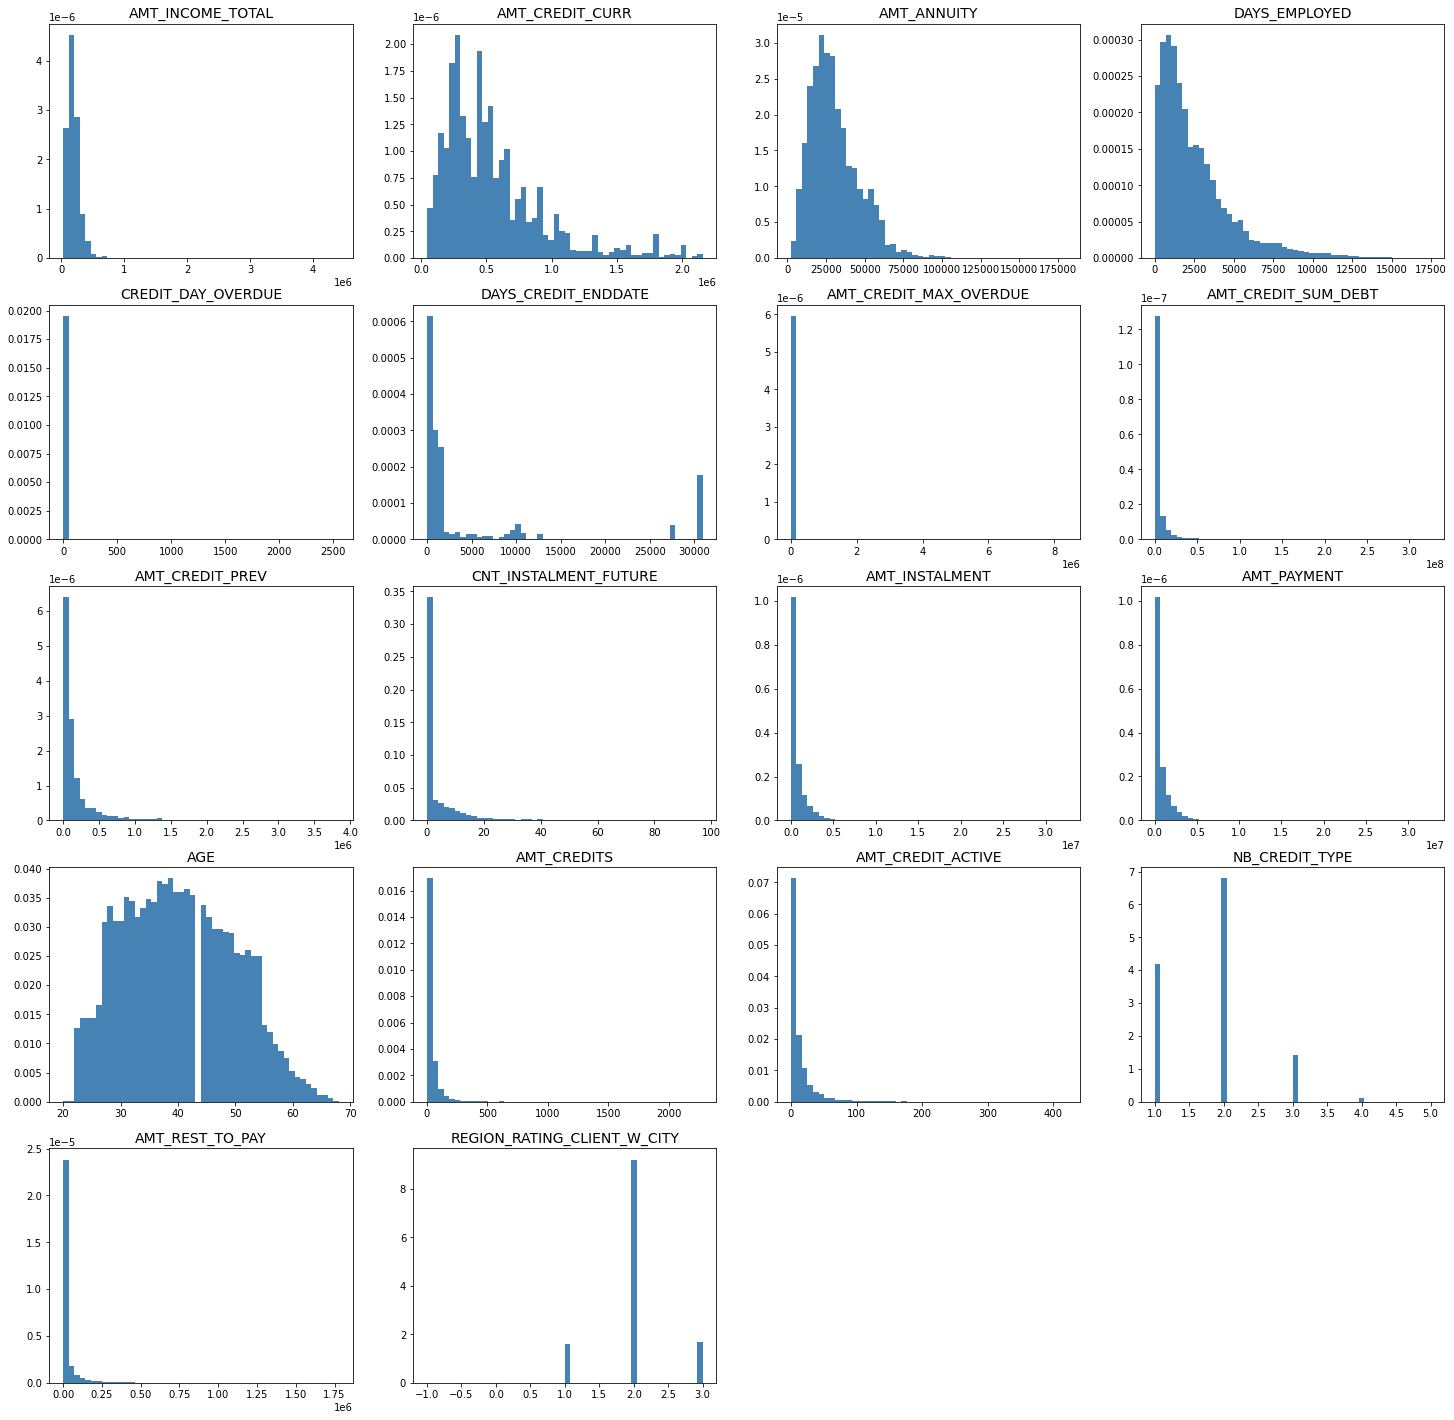

In [72]:
# affichage des histogrammes des variables numériques, afin notamment de voir s'il est nécessaire de les passer en log. 

colonnes = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR', 'AMT_ANNUITY',
       'DAYS_EMPLOYED',  'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT',
         'AMT_CREDIT_PREV',
        'CNT_INSTALMENT_FUTURE',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'AGE', 'AMT_CREDITS',
       'AMT_CREDIT_ACTIVE', 'NB_CREDIT_TYPE', 'AMT_REST_TO_PAY','REGION_RATING_CLIENT_W_CITY']

# affichage des histogrammes de ces variables

fig = plt.figure(figsize=(25, 25))
for index in range (len(colonnes)) :
    ax = fig.add_subplot(5,4, (index+1))
    h = ax.hist(data_test[colonnes[index]], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(colonnes[index], fontsize=14)

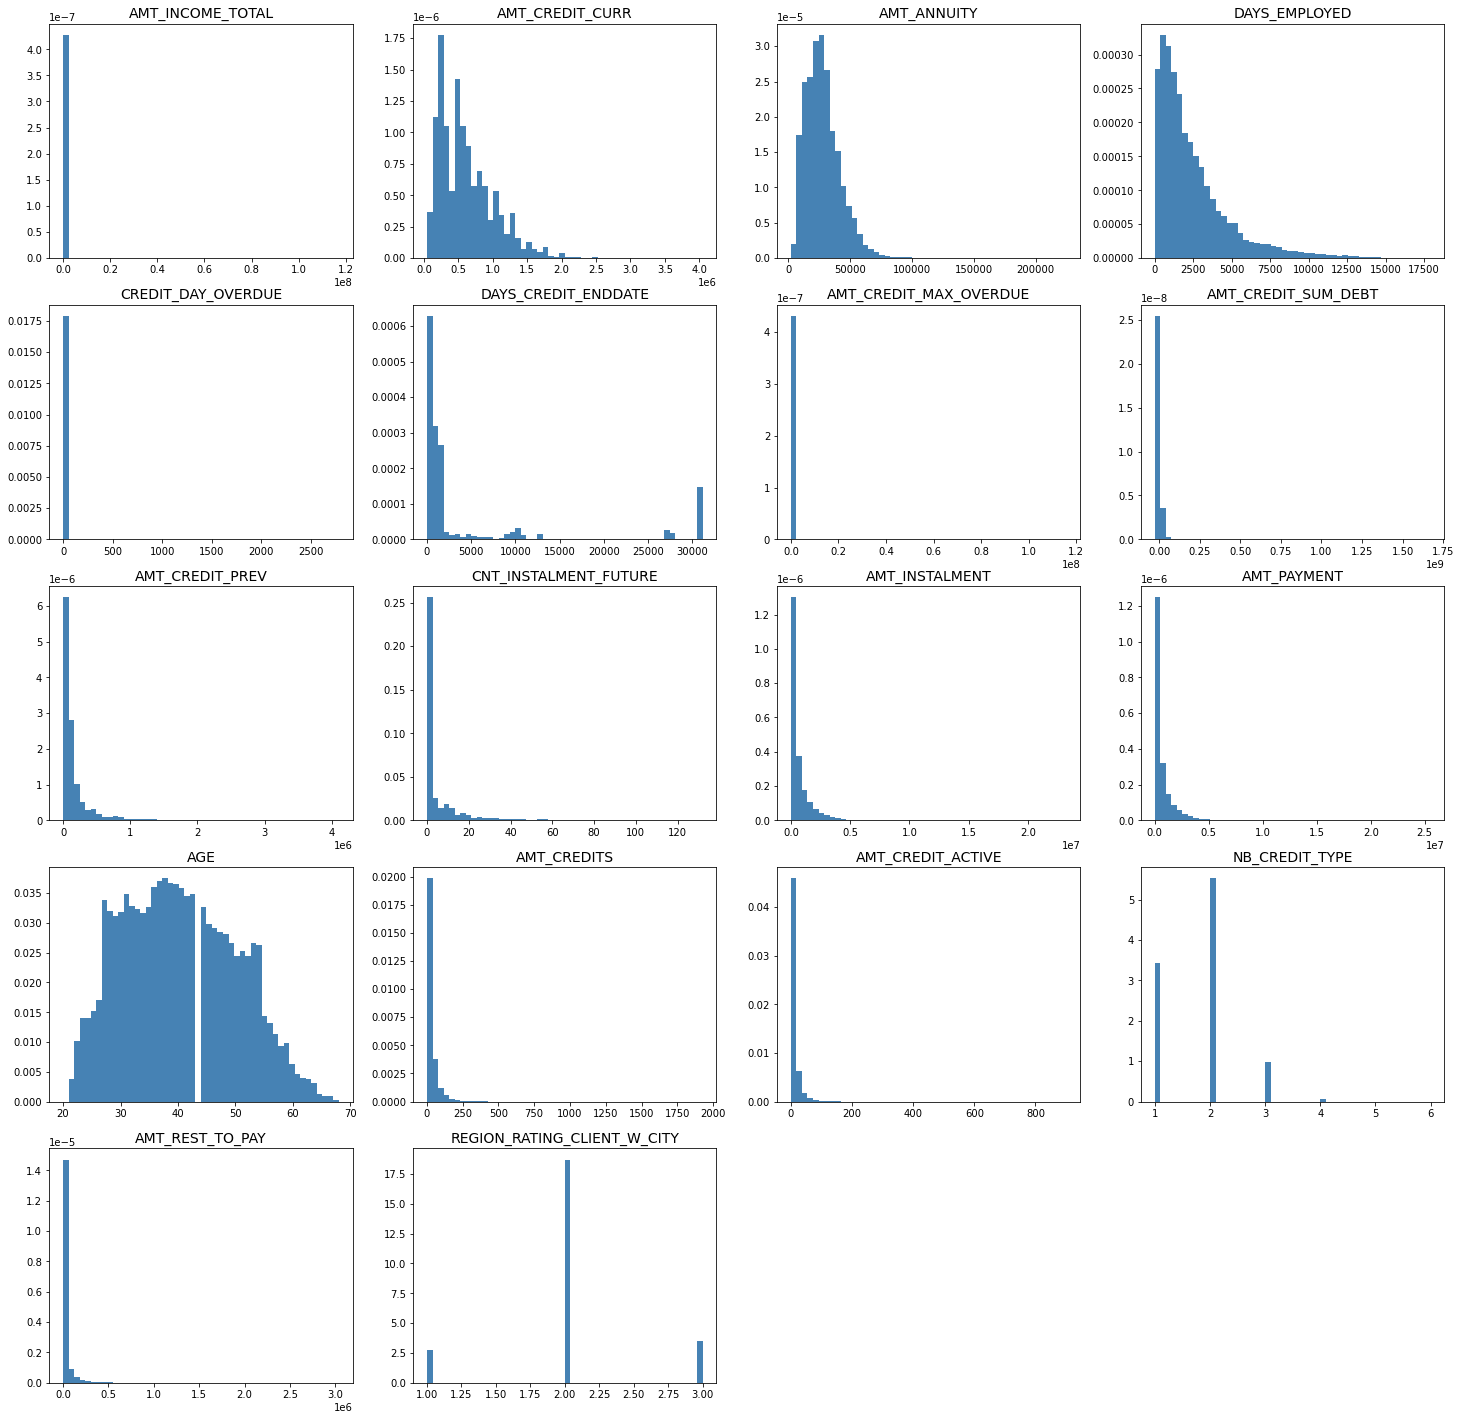

In [73]:
# affichage des histogrammes des variables numériques, afin notamment de voir s'il est nécessaire de les passer en log. 

colonnes = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR', 'AMT_ANNUITY',
       'DAYS_EMPLOYED',  'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT',
         'AMT_CREDIT_PREV',
        'CNT_INSTALMENT_FUTURE',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'AGE', 'AMT_CREDITS',
       'AMT_CREDIT_ACTIVE', 'NB_CREDIT_TYPE', 'AMT_REST_TO_PAY','REGION_RATING_CLIENT_W_CITY']

# affichage des histogrammes de ces variables

fig = plt.figure(figsize=(25, 25))
for index in range (len(colonnes)) :
    ax = fig.add_subplot(5,4, (index+1))
    h = ax.hist(data_train[colonnes[index]], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(colonnes[index], fontsize=14)

In [74]:
# modification des variables en log :

colonnes = ['AMT_INCOME_TOTAL',
       'DAYS_EMPLOYED',  'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT',
         'AMT_CREDIT_PREV',
        'CNT_INSTALMENT_FUTURE',
       'AMT_INSTALMENT', 'AMT_PAYMENT',  'AMT_CREDITS',
       'AMT_CREDIT_ACTIVE', 'AMT_REST_TO_PAY']

for colonne in colonnes :
    data_test[colonne+"_log"] = np.log( 1 + data_test[colonne])
    data_train[colonne+"_log"] = np.log( 1 + data_train[colonne])

C:\Users\jejed\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
data_train.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TARGET,SK_ID_BUREAU,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,CREDIT_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_CREDIT_PREV,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CNT_INSTALMENT_FUTURE,AMT_INSTALMENT,AMT_PAYMENT,AGE,AMT_CREDITS,AMT_CREDIT_ACTIVE,NB_CREDIT_TYPE,AMT_REST_TO_PAY,AMT_INCOME_TOTAL_log,DAYS_EMPLOYED_log,CREDIT_DAY_OVERDUE_log,DAYS_CREDIT_ENDDATE_log,AMT_CREDIT_MAX_OVERDUE_log,AMT_CREDIT_SUM_DEBT_log,AMT_CREDIT_PREV_log,CNT_INSTALMENT_FUTURE_log,AMT_INSTALMENT_log,AMT_PAYMENT_log,AMT_CREDITS_log,AMT_CREDIT_ACTIVE_log,AMT_REST_TO_PAY_log
0,100002,M,0,1,0,202500.0,406597.5,24700.5,Single / not married,House / apartment,637,1.0,Working,Secondary / secondary special,2,Business Entity Type 3,1,6158904.0,0.0,780.0,5043.645,245781.0,"{Consumer credit, Credit card}",1038818.0,Consumer loans,179055.0,1,XAP,6.0,219625.695,219625.695,25,8,2,2,0.000,12.218500,6.458338,0.0,6.660575,8.526083,12.41220,12.095454,1.945910,12.299685,12.299685,2.197225,1.098612,0.000000
1,100003,F,0,0,0,270000.0,1293502.5,35698.5,Married,House / apartment,1188,2.0,State servant,Higher education,1,School,0,5885877.0,0.0,1216.0,0.000,0.0,"{Consumer credit, Credit card}",1810518.0,Cash loans,1035882.0,1,XAP,1.0,1618864.650,1618864.650,45,12,3,2,0.000,12.506181,7.080868,0.0,7.104144,0.000000,0.00000,13.850765,0.693147,14.297236,14.297236,2.564949,1.386294,0.000000
2,100004,M,1,1,0,67500.0,135000.0,6750.0,Single / not married,House / apartment,225,1.0,Working,Secondary / secondary special,2,Government,0,6829133.0,0.0,0.0,0.000,0.0,{Consumer credit},1564014.0,Consumer loans,20106.0,1,XAP,0.0,21288.465,21288.465,52,2,0,1,0.000,11.119898,5.420535,0.0,0.000000,0.000000,0.00000,9.908823,0.000000,9.965968,9.965968,1.098612,0.000000,0.000000
4,100007,M,0,1,0,121500.0,513000.0,21865.5,Single / not married,House / apartment,3038,1.0,Working,Secondary / secondary special,2,Religion,0,5987200.0,0.0,0.0,0.000,0.0,{Consumer credit},2001242.0,Cash loans,180000.0,1,XAP,14.0,835985.340,806127.975,54,6,0,1,29857.365,11.707678,8.019284,0.0,0.000000,0.000000,0.00000,12.100718,2.708050,13.636368,13.599999,1.945910,0.000000,10.304220
5,100008,M,0,1,0,99000.0,490495.5,27517.5,Married,House / apartment,1588,2.0,State servant,Secondary / secondary special,2,Other,0,6491433.0,0.0,471.0,0.000,1200285.0,{Consumer credit},2218188.0,Consumer loans,162598.5,1,XAP,0.0,969603.750,957617.595,46,15,5,1,11986.155,11.502885,7.370860,0.0,6.156979,0.000000,13.99807,11.999045,0.000000,13.784644,13.772205,2.772589,1.791759,9.391591


In [76]:
from sklearn import manifold, decomposition

colonnes = ['CODE_GENDER','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 
             'ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_PREV']

for col in colonnes :
    colonnes = pd.get_dummies(data_train[col])
    pca = decomposition.PCA(n_components= 1)
    data_train[col+"_num"] = pca.fit_transform(colonnes)
    
    colonnes = pd.get_dummies(data_test[col])
    pca = decomposition.PCA(n_components= 1)
    data_test[col+"_num"] = pca.fit_transform(colonnes)
    


In [77]:
data_train.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TARGET,SK_ID_BUREAU,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,CREDIT_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_CREDIT_PREV,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CNT_INSTALMENT_FUTURE,AMT_INSTALMENT,AMT_PAYMENT,AGE,AMT_CREDITS,AMT_CREDIT_ACTIVE,NB_CREDIT_TYPE,AMT_REST_TO_PAY,AMT_INCOME_TOTAL_log,DAYS_EMPLOYED_log,CREDIT_DAY_OVERDUE_log,DAYS_CREDIT_ENDDATE_log,AMT_CREDIT_MAX_OVERDUE_log,AMT_CREDIT_SUM_DEBT_log,AMT_CREDIT_PREV_log,CNT_INSTALMENT_FUTURE_log,AMT_INSTALMENT_log,AMT_PAYMENT_log,AMT_CREDITS_log,AMT_CREDIT_ACTIVE_log,AMT_REST_TO_PAY_log,CODE_GENDER_num,NAME_FAMILY_STATUS_num,NAME_HOUSING_TYPE_num,NAME_EDUCATION_TYPE_num,NAME_INCOME_TYPE_num,ORGANIZATION_TYPE_num,NAME_CONTRACT_TYPE_PREV_num
0,100002,M,0,1,0,202500.0,406597.5,24700.5,Single / not married,House / apartment,637,1.0,Working,Secondary / secondary special,2,Business Entity Type 3,1,6158904.0,0.0,780.0,5043.645,245781.0,"{Consumer credit, Credit card}",1038818.0,Consumer loans,179055.0,1,XAP,6.0,219625.695,219625.695,25,8,2,2,0.000,12.218500,6.458338,0.0,6.660575,8.526083,12.41220,12.095454,1.945910,12.299685,12.299685,2.197225,1.098612,0.000000,0.894130,0.909276,-0.140684,-0.405581,-0.460300,0.746098,-0.497446
1,100003,F,0,0,0,270000.0,1293502.5,35698.5,Married,House / apartment,1188,2.0,State servant,Higher education,1,School,0,5885877.0,0.0,1216.0,0.000,0.0,"{Consumer credit, Credit card}",1810518.0,Cash loans,1035882.0,1,XAP,1.0,1618864.650,1618864.650,45,12,3,2,0.000,12.506181,7.080868,0.0,7.104144,0.000000,0.00000,13.850765,0.693147,14.297236,14.297236,2.564949,1.386294,0.000000,-0.520084,-0.387272,-0.140684,1.007090,0.370609,-0.206748,0.909348
2,100004,M,1,1,0,67500.0,135000.0,6750.0,Single / not married,House / apartment,225,1.0,Working,Secondary / secondary special,2,Government,0,6829133.0,0.0,0.0,0.000,0.0,{Consumer credit},1564014.0,Consumer loans,20106.0,1,XAP,0.0,21288.465,21288.465,52,2,0,1,0.000,11.119898,5.420535,0.0,0.000000,0.000000,0.00000,9.908823,0.000000,9.965968,9.965968,1.098612,0.000000,0.000000,0.894130,0.909276,-0.140684,-0.405581,-0.460300,-0.213198,-0.497446
4,100007,M,0,1,0,121500.0,513000.0,21865.5,Single / not married,House / apartment,3038,1.0,Working,Secondary / secondary special,2,Religion,0,5987200.0,0.0,0.0,0.000,0.0,{Consumer credit},2001242.0,Cash loans,180000.0,1,XAP,14.0,835985.340,806127.975,54,6,0,1,29857.365,11.707678,8.019284,0.0,0.000000,0.000000,0.00000,12.100718,2.708050,13.636368,13.599999,1.945910,0.000000,10.304220,0.894130,0.909276,-0.140684,-0.405581,-0.460300,-0.171438,0.909348
5,100008,M,0,1,0,99000.0,490495.5,27517.5,Married,House / apartment,1588,2.0,State servant,Secondary / secondary special,2,Other,0,6491433.0,0.0,471.0,0.000,1200285.0,{Consumer credit},2218188.0,Consumer loans,162598.5,1,XAP,0.0,969603.750,957617.595,46,15,5,1,11986.155,11.502885,7.370860,0.0,6.156979,0.000000,13.99807,11.999045,0.000000,13.784644,13.772205,2.772589,1.791759,9.391591,0.894130,-0.387272,-0.140684,-0.405581,0.370609,-0.246907,-0.497446


In [78]:
# voici la liste des variables qui vont entrer dans le modèle (on garde des variables explicites pour le dashboard)

variables_test = ['CODE_GENDER_num','FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_CREDIT_CURR', 'AMT_ANNUITY', 
                  'CNT_FAM_MEMBERS','AMT_INCOME_TOTAL',"NAME_FAMILY_STATUS_num","NAME_HOUSING_TYPE_num",
                  'NAME_INCOME_TYPE_num','NAME_EDUCATION_TYPE_num','REGION_RATING_CLIENT_W_CITY',
                  'ORGANIZATION_TYPE_num','NAME_CONTRACT_STATUS', 'AGE','NB_CREDIT_TYPE',
                   'NAME_CONTRACT_TYPE_PREV_num', 'AMT_INCOME_TOTAL_log',
       'DAYS_EMPLOYED_log', 'CREDIT_DAY_OVERDUE_log','DAYS_CREDIT_ENDDATE_log', 'AMT_CREDIT_MAX_OVERDUE_log',
       'AMT_CREDIT_SUM_DEBT_log', 'AMT_CREDIT_PREV_log','CNT_INSTALMENT_FUTURE_log', 'AMT_INSTALMENT_log', 'AMT_PAYMENT_log',
       'AMT_CREDITS_log', 'AMT_CREDIT_ACTIVE_log', 'AMT_REST_TO_PAY_log']

variables_train = variables_test + ['TARGET']

<ipython-input-79-7f9b91e64bae>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 3))


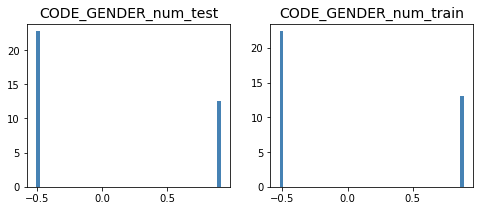

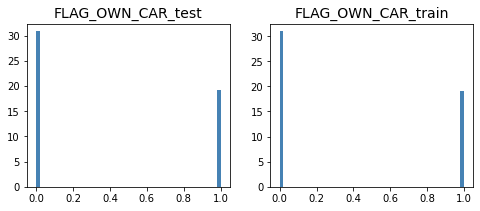

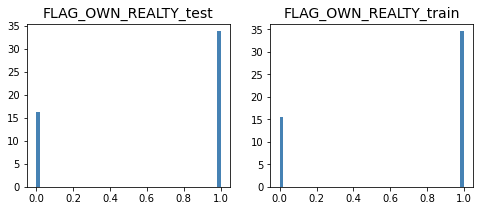

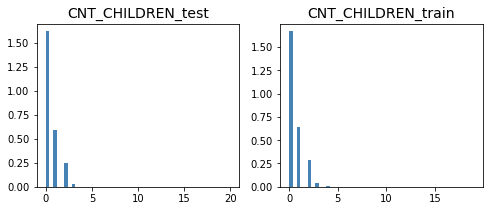

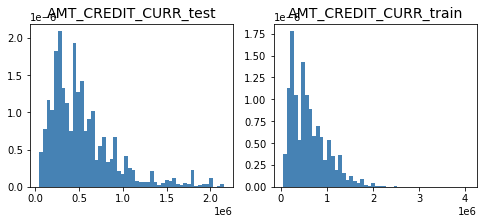

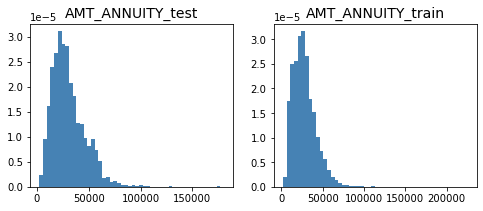

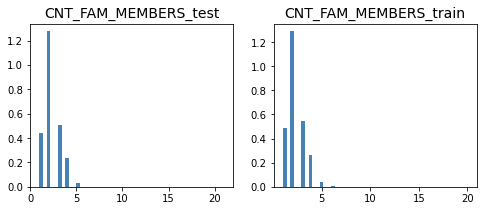

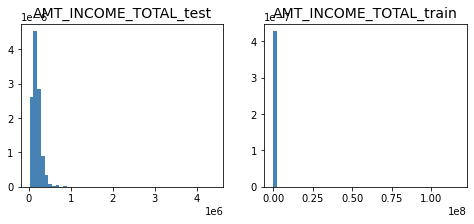

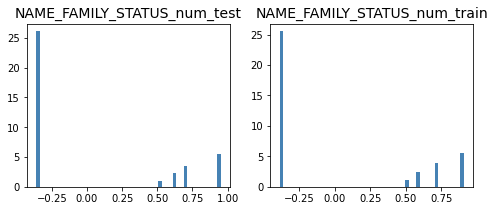

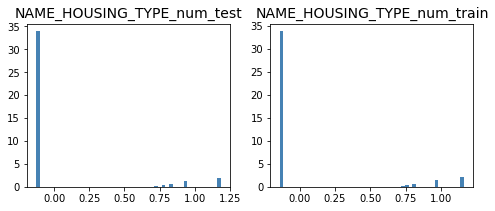

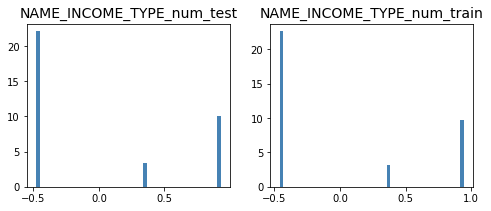

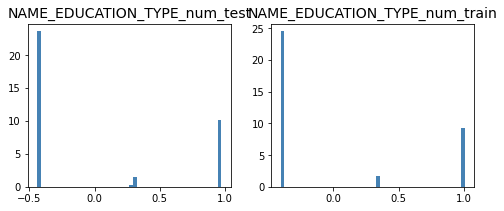

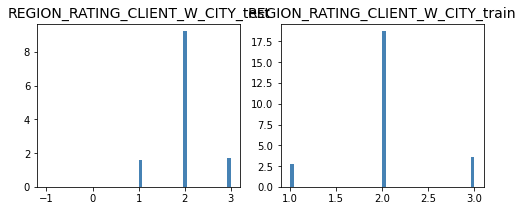

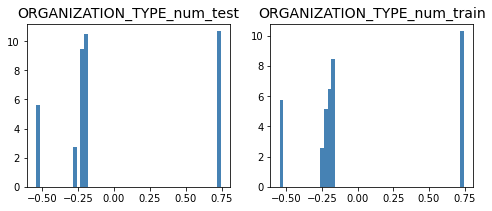

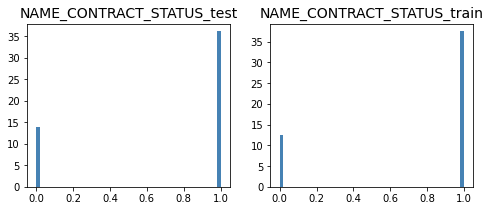

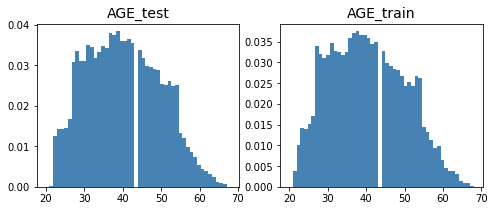

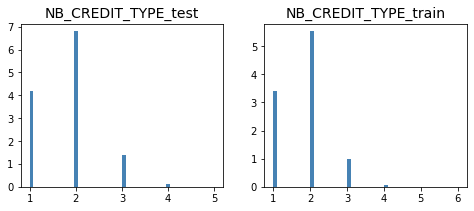

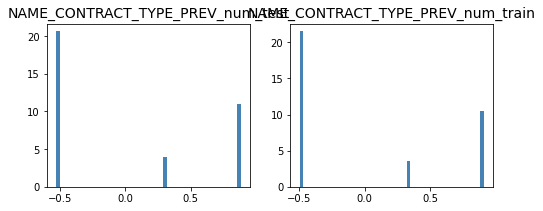

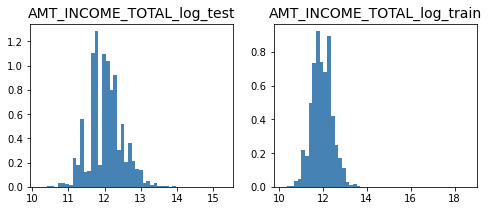

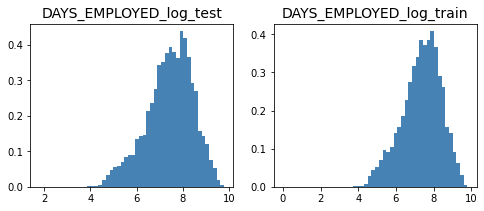

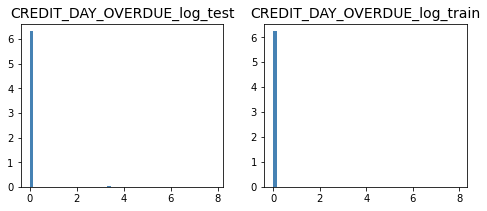

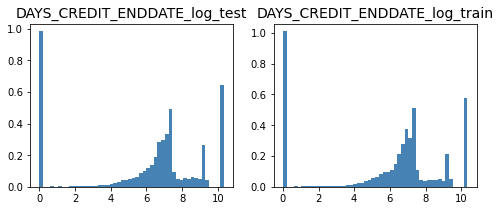

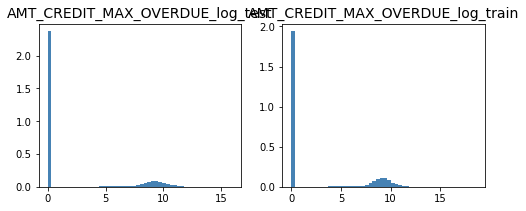

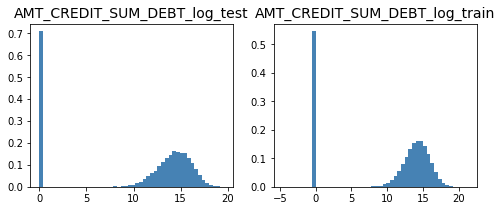

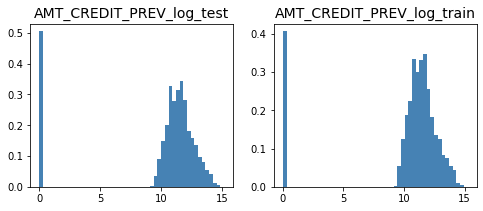

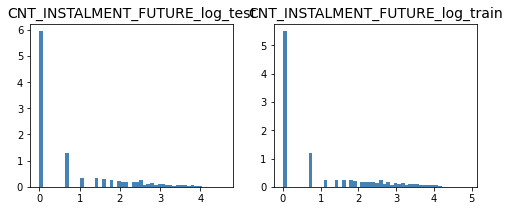

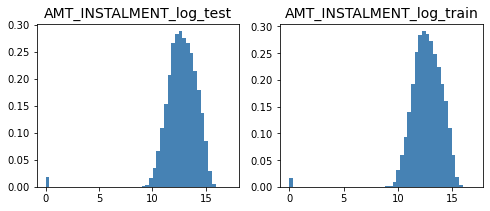

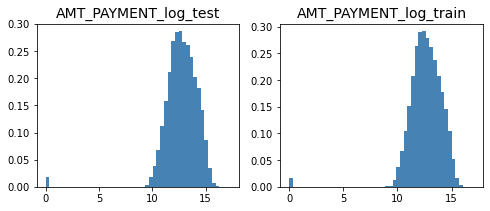

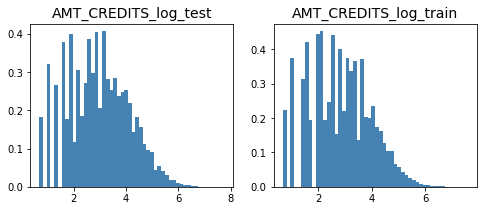

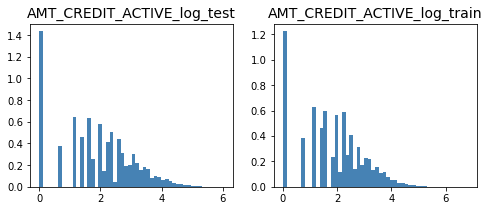

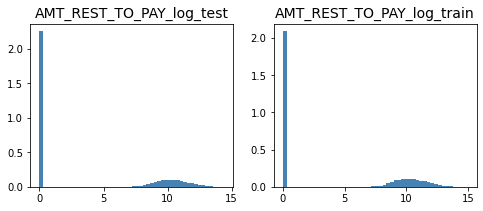

In [79]:
# comparaison des variables des sets train / test

for col in variables_test:
    fig = plt.figure(figsize=(8, 3))  
    ax = fig.add_subplot(1,2, (1))
    h = ax.hist(data_test[col], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(col+"_test", fontsize=14)
    ax = fig.add_subplot(1,2, (2))
    h = ax.hist(data_train[col], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(col+"_train", fontsize=14)
    


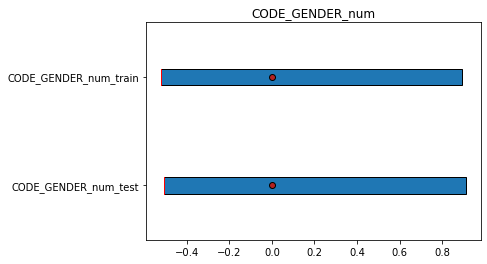

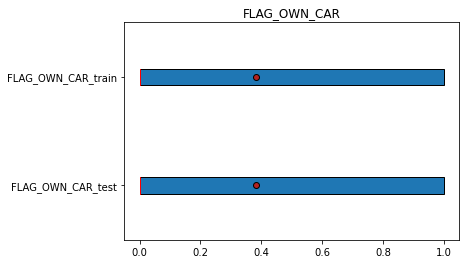

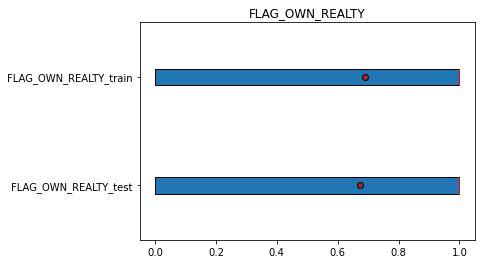

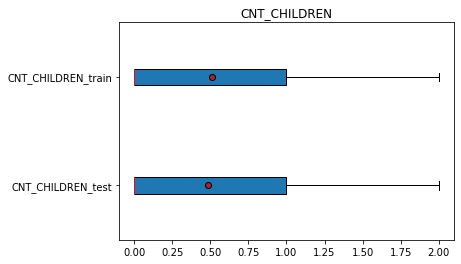

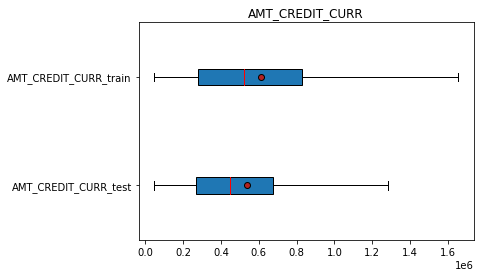

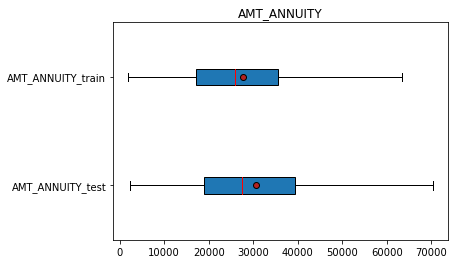

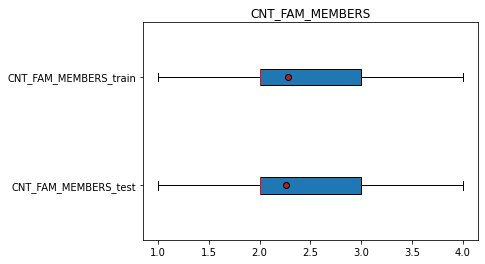

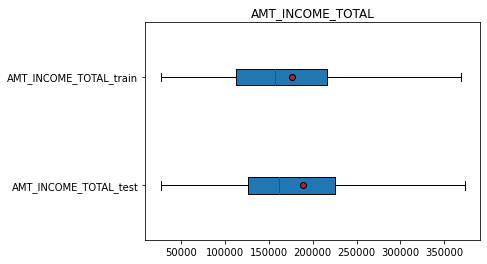

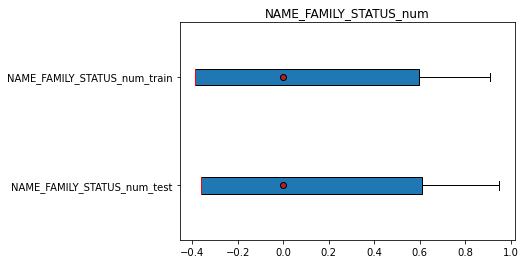

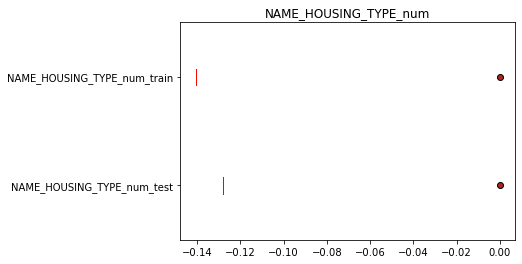

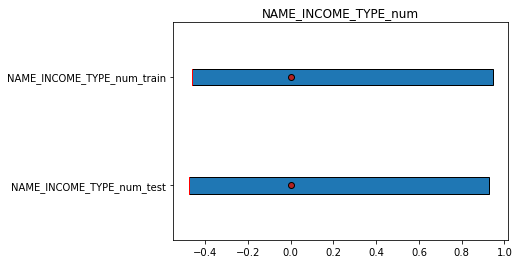

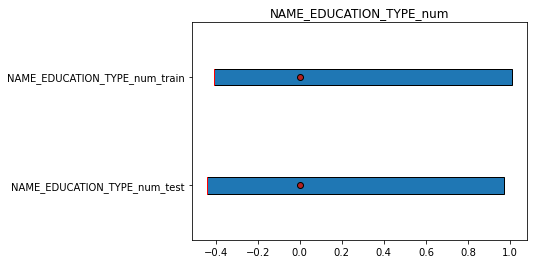

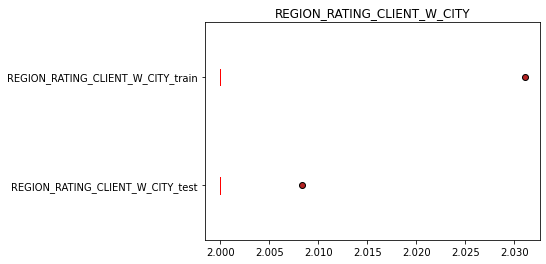

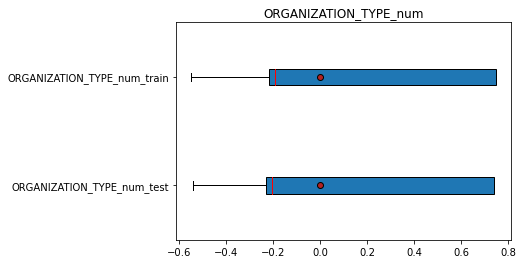

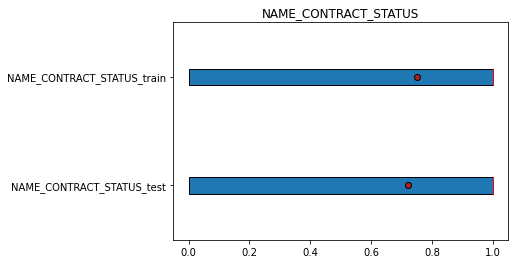

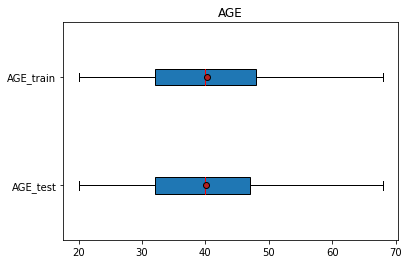

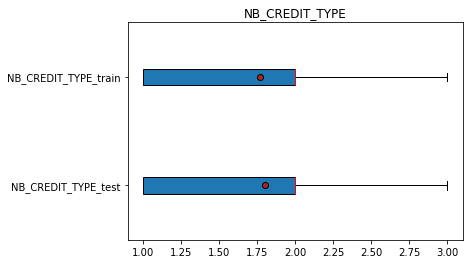

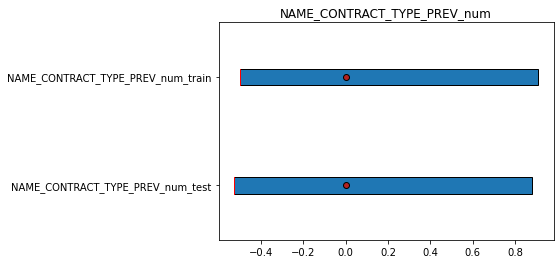

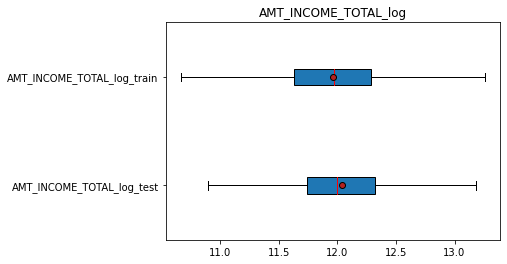

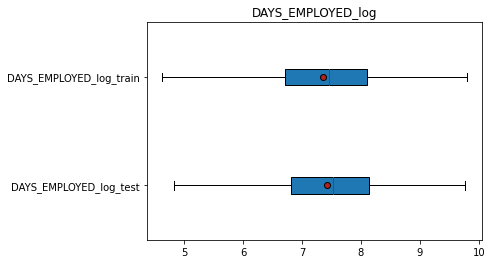

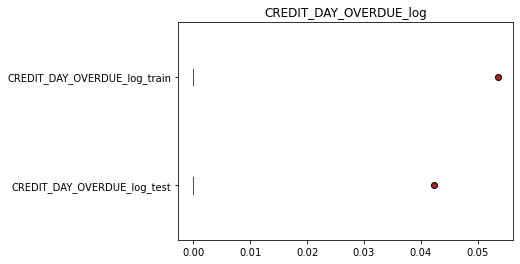

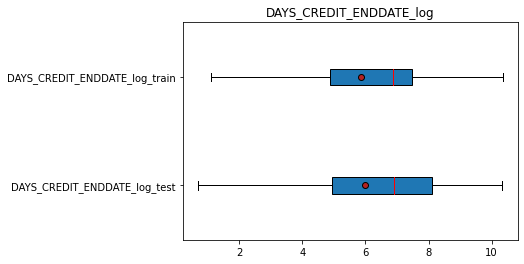

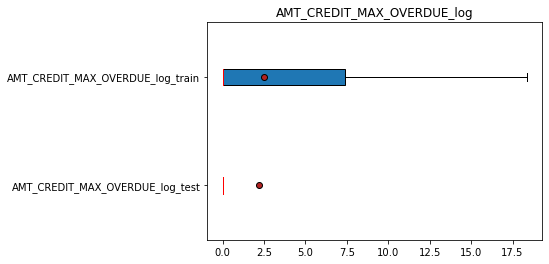

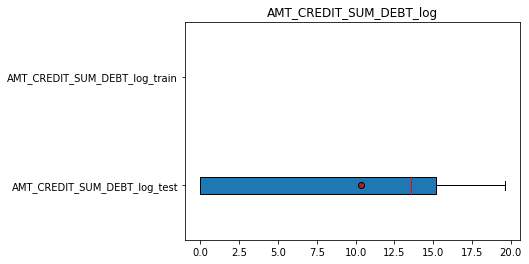

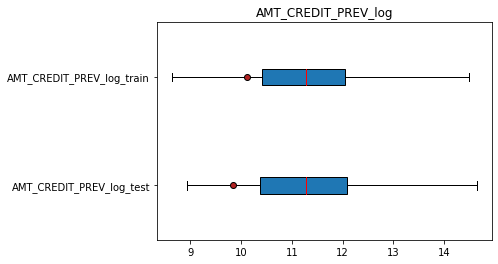

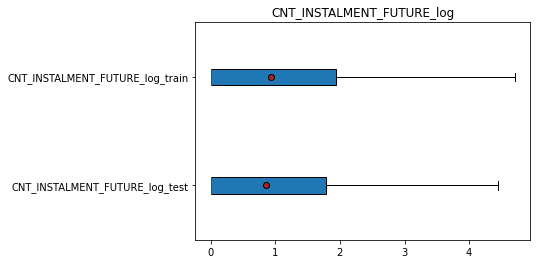

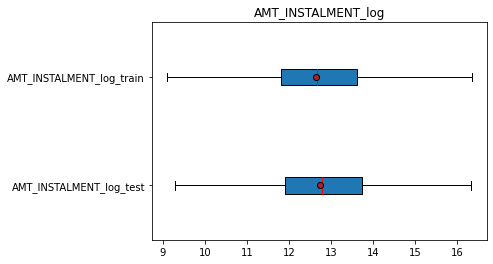

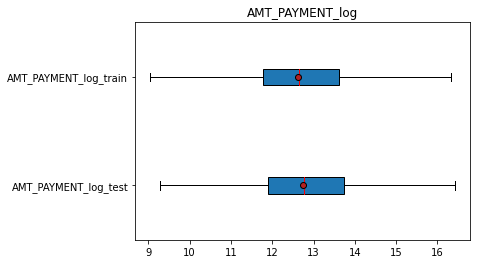

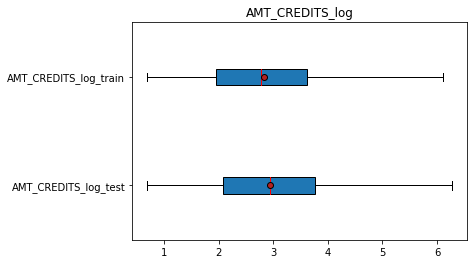

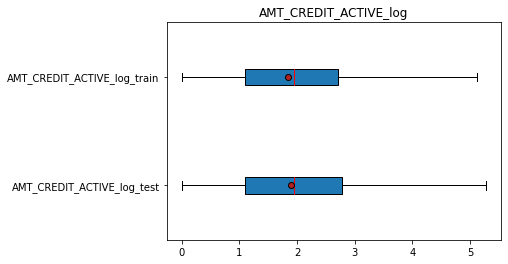

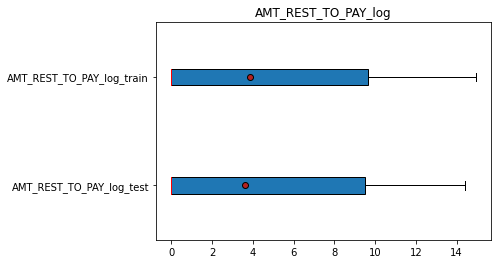

In [80]:
# comparaison des variables des sets train / test

medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

for col in variables_test:
    plt.boxplot([data_test[col],data_train[col]], labels=[col+"_test",col+"_train"], showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.title(col)
    plt.show()



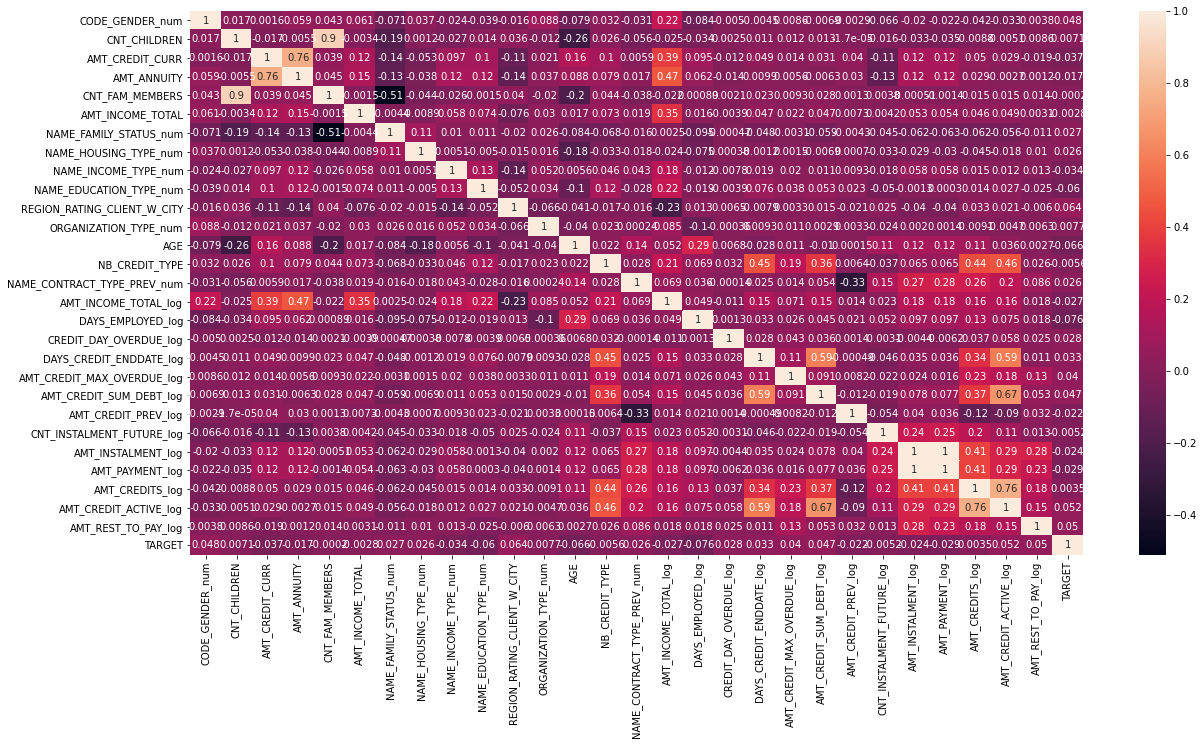

In [81]:
corr_df = data_train[variables_train].corr(method='pearson')

plt.figure(figsize=(20, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

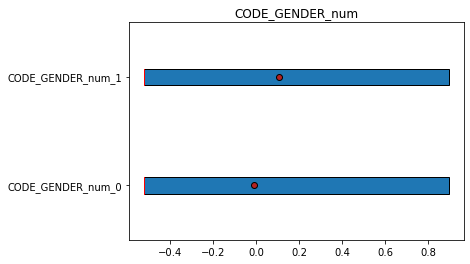

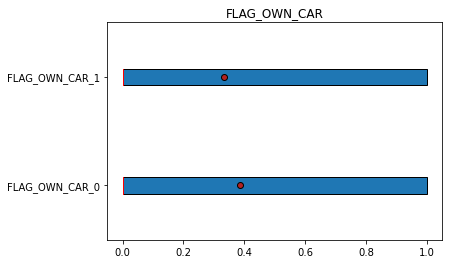

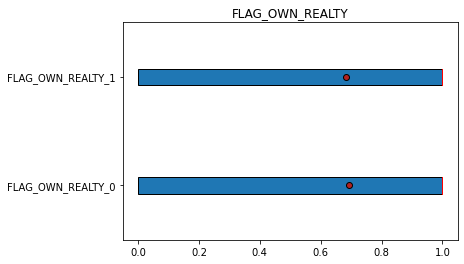

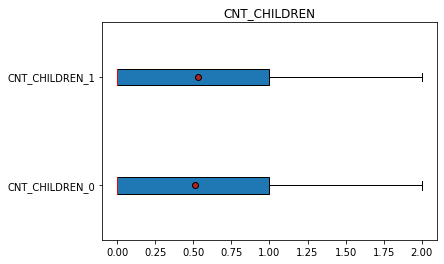

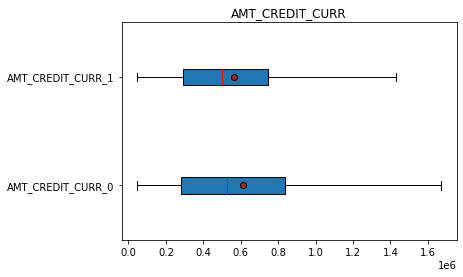

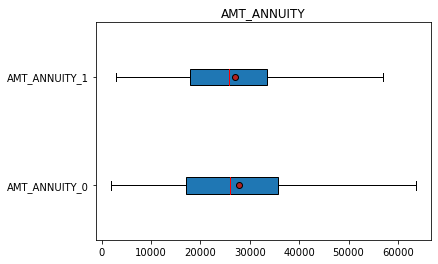

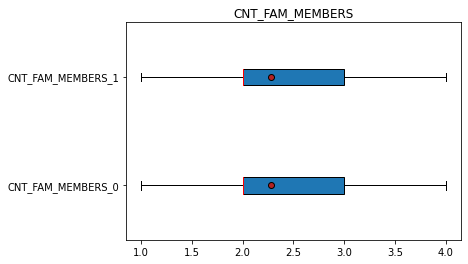

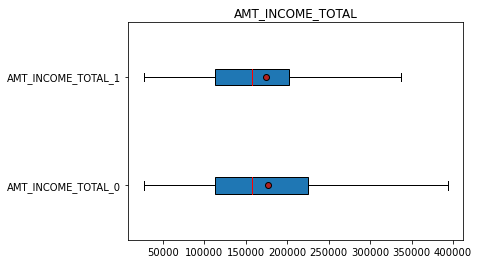

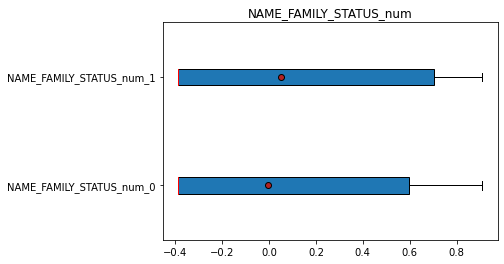

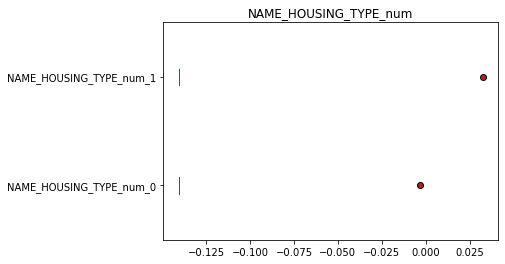

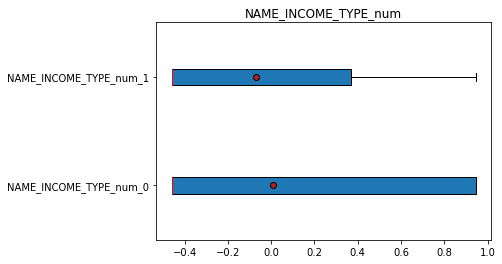

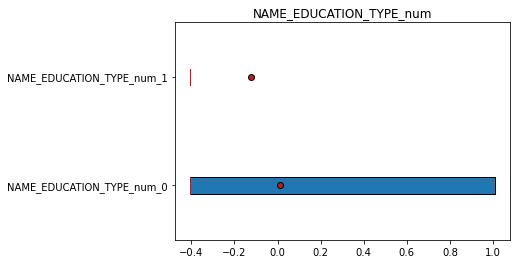

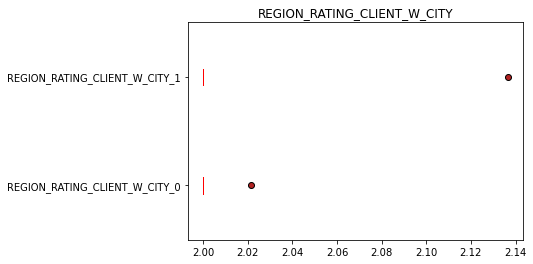

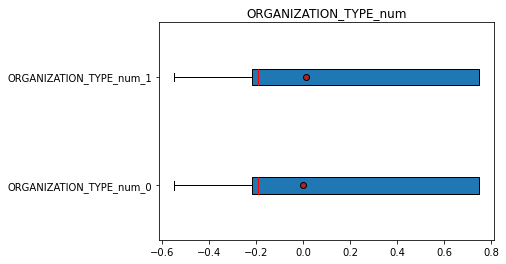

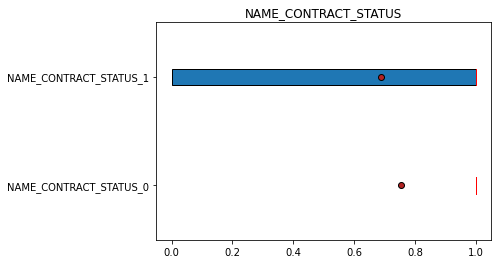

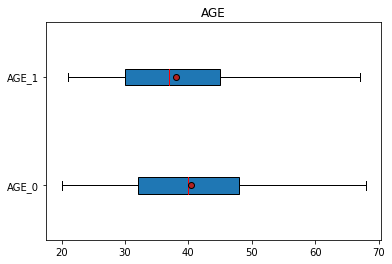

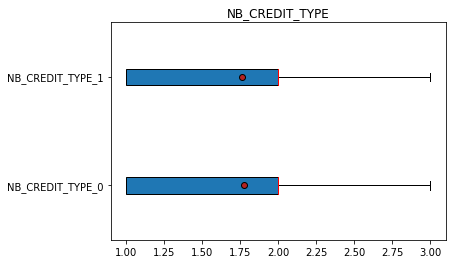

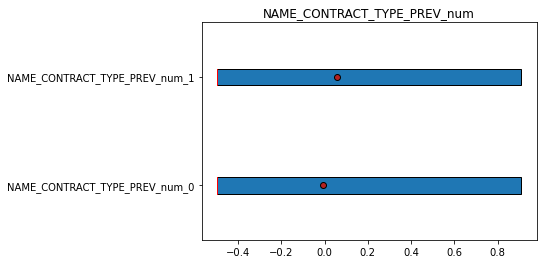

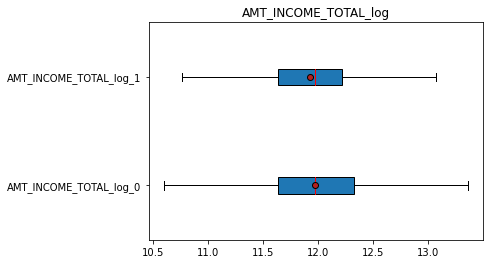

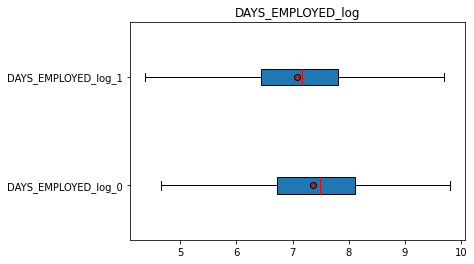

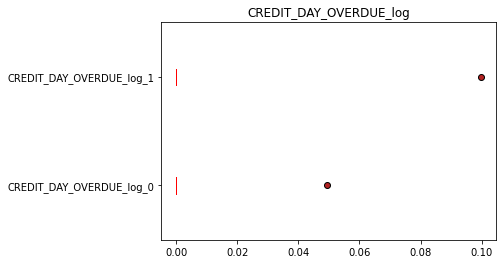

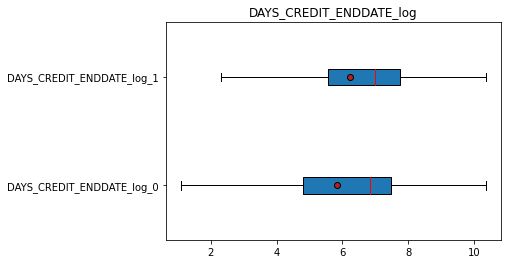

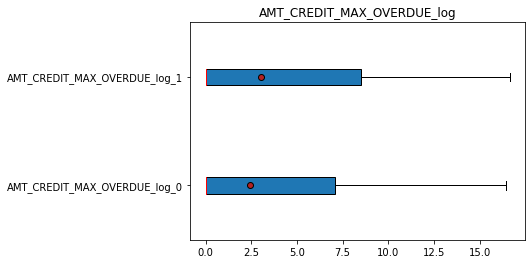

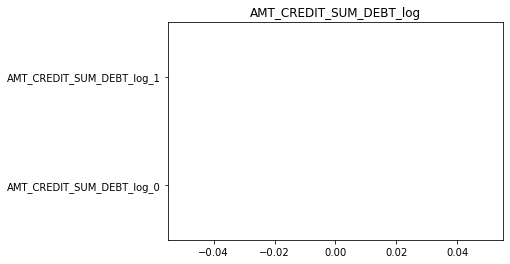

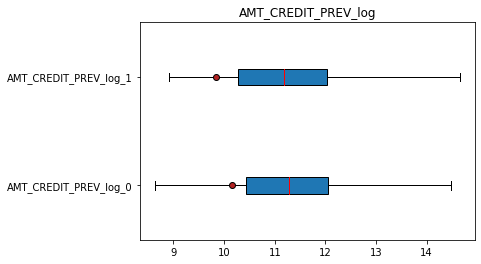

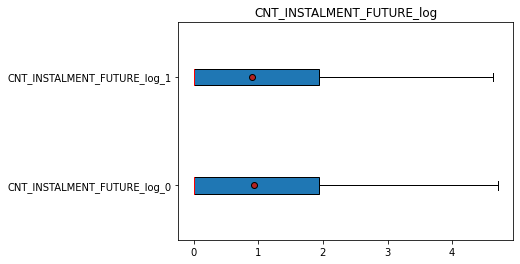

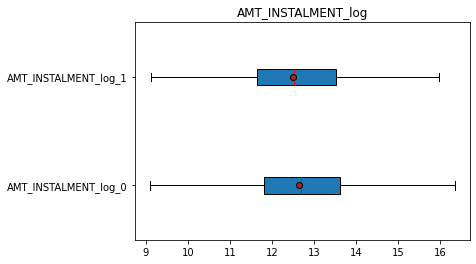

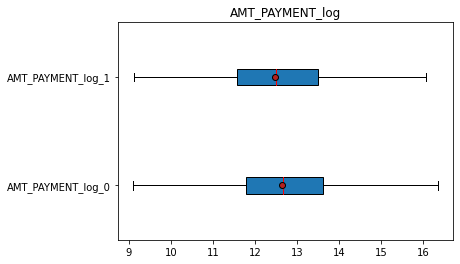

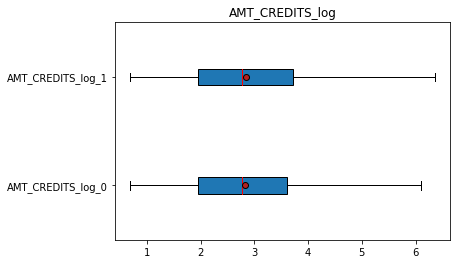

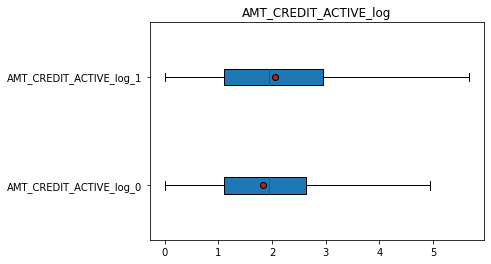

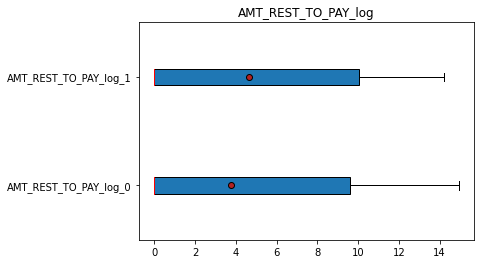

In [82]:
# on regarde les différences dans le set Train entre les crédits refusés ou acceptés. 



medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

for col in variables_test:
    plt.boxplot([data_train[data_train["TARGET"]==0][col],data_train[data_train["TARGET"]==1][col]], 
                labels=[col+"_0",col+"_1"], showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.title(col)
    plt.show()



**Sélection des variables finale**  

On choisie les variables qui ont le plus d'impact sur la target. 

In [83]:
# on va garder certaines variables, afin de réduire le fléau de dimension

variables_test = ['AMT_INCOME_TOTAL_log','REGION_RATING_CLIENT_W_CITY',
                 'ORGANIZATION_TYPE_num','NAME_CONTRACT_STATUS','DAYS_EMPLOYED_log',
                 'AMT_CREDIT_MAX_OVERDUE_log',
                 'AMT_CREDIT_ACTIVE_log','AMT_REST_TO_PAY_log','CODE_GENDER_num']

### Gestion des données déséquilibrées via SMOTE

In [84]:
data_train.dropna(inplace=True)

In [85]:
# Centrage et Réduction des données d'entraînement
from sklearn import preprocessing

X = data_train[variables_test].values      # il s'agit des variables train sans la target
colonnes = data_train[variables_test].columns
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

y = data_train["TARGET"].values

In [86]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Taille des données avant SMOTE: {X.shape}
Taille des données après SMOTE: {X_sm.shape}''')

print('\nRépartition des classes positives et négatives:')
unique, counts = np.unique(y_sm, return_counts=True)

print(np.asarray((unique, counts)).T)

Taille des données avant SMOTE: (203803, 9)
Taille des données après SMOTE: (373178, 9)

Répartition des classes positives et négatives:
[[     0 186589]
 [     1 186589]]


# Mise en place du modèle

In [87]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_sm, y_sm, test_size=0.3 )

On a séparé notre set en un jeu de test et un jeu d'entraînement.  

On va maintenant observer plusieurs modèles de classification.  

Le temps d'exécution de chaque approche va être mesuré.  

Les hyperparamètres des différentes approches sont optimisés par validation croisée.  

Pour chaque modèle optimisé, on en affiche la matrice de confusion et la courbe ROC.  

Les métriques choisies sont : _ le rappel (recall)  
_ la précision  
_ l'accuracy    
_ l'AUROC  
_ le taux de Faux Négatifs  

Dans notre modèle, nous voulons avant tout identifier les personnes qui ne pourront pas rembourser leur prêt. Ainsi, on veut minimiser le taux de Faux Négatifs (ie des personnes dont on a attribué l'étiquette 0 alors qu'ils ne rembourseront pas leur prêt, ce qui correspond à l'étiquette 1). 

Cela revient à maximiser le recall.  

### 1er modèle : approche naïve de classification (score aléatoire)

Time : 0.01s
Recall : 0.50
Précision : 0.50
Accuracy : 0.50
AUROC : 0.50
Faux Négatifs : 27989.00


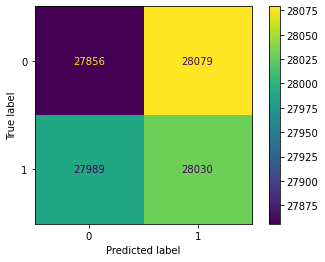

Text(0, 0.5, 'Sensibilite')

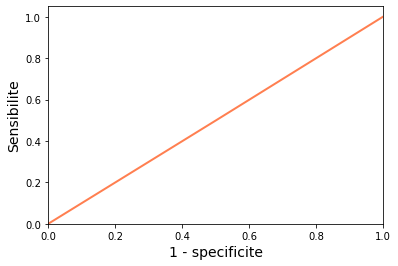

In [88]:
import timeit

from sklearn import metrics

from sklearn import dummy
dum = dummy.DummyClassifier(strategy='uniform')

start_time = timeit.default_timer()

# Entraînement
dum.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test)

elapsed = timeit.default_timer() - start_time

# Evaluation
print( "Time : {:.2f}s".format(elapsed) )
print("Recall : {:.2f}".format(metrics.recall_score(y_test,y_pred_dum)))
print("Précision : {:.2f}".format(metrics.precision_score(y_test,y_pred_dum)))
print("Accuracy : {:.2f}".format(metrics.accuracy_score(y_test,y_pred_dum)))
print("AUROC : {:.2f}".format(metrics.roc_auc_score(y_test,y_pred_dum)))
CM = metrics.confusion_matrix(y_test, y_pred_dum)
print("Faux Négatifs : {:.2f}".format(CM[1,0]))

# affichage de la matrice de confusion et de la courbe ROC  

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()
plt.show()

[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_dum)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

### 2e modèle : régression logistique

C:\Users\jejed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jejed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jejed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jejed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'C': 0.001, 'penalty': 'l2'}
Time : 6.06s
Recall : 0.60
Précision : 0.60
Accuracy : 0.60
AUROC : 0.60
Faux Négatifs : 22396.00


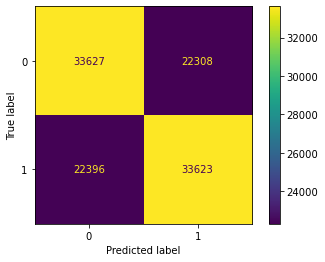

Text(0, 0.5, 'Sensibilite')

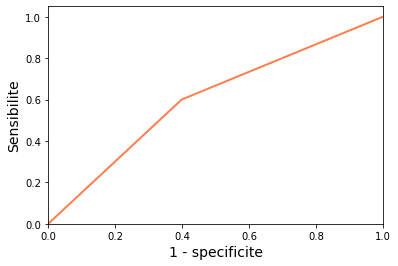

In [89]:
from sklearn import linear_model

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'penalty':["l1","l2",'elasticnet'], 'C': np.logspace(-3, 3, 7)}

LM = model_selection.GridSearchCV( linear_model.LogisticRegression(), param_grid, cv=5, scoring = "recall")

start_time = timeit.default_timer()

# Entraînement
LM.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(LM.best_params_)

# Prédiction sur le jeu de test
y_pred = LM.predict(X_test)

elapsed = timeit.default_timer() - start_time

# Evaluation
print( "Time : {:.2f}s".format(elapsed) )
print("Recall : {:.2f}".format(metrics.recall_score(y_test,y_pred)))
print("Précision : {:.2f}".format(metrics.precision_score(y_test,y_pred)))
print("Accuracy : {:.2f}".format(metrics.accuracy_score(y_test,y_pred)))
print("AUROC : {:.2f}".format(metrics.roc_auc_score(y_test,y_pred)))
CM = metrics.confusion_matrix(y_test, y_pred)
print("Faux Négatifs : {:.2f}".format(CM[1,0]))

# affichage de la matrice de confusion et de la courbe ROC  

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()
plt.show()

[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

### 3e modèle : SVM


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'C': 0.001}
Time : 7.24s
Recall : 0.60
Précision : 0.60
Accuracy : 0.60
AUROC : 0.60
Faux Négatifs : 22400.00


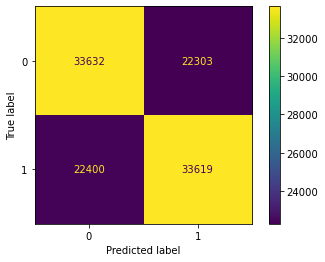

Text(0, 0.5, 'Sensibilite')

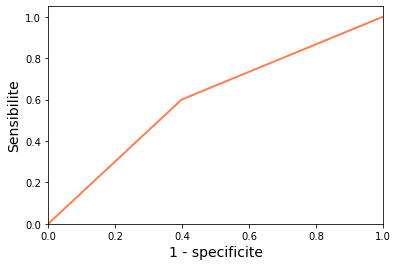

In [90]:
from sklearn import svm

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'C': np.logspace(-3, 3, 7)}

SVC = model_selection.GridSearchCV( svm.LinearSVC(dual = False), param_grid, cv=5, scoring = "recall")

start_time = timeit.default_timer()

# Entraînement
SVC.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(SVC.best_params_)

# Prédiction sur le jeu de test
y_pred = SVC.predict(X_test)

elapsed = timeit.default_timer() - start_time

# Evaluation
print( "Time : {:.2f}s".format(elapsed) )
print("Recall : {:.2f}".format(metrics.recall_score(y_test,y_pred)))
print("Précision : {:.2f}".format(metrics.precision_score(y_test,y_pred)))
print("Accuracy : {:.2f}".format(metrics.accuracy_score(y_test,y_pred)))
print("AUROC : {:.2f}".format(metrics.roc_auc_score(y_test,y_pred)))
CM = metrics.confusion_matrix(y_test, y_pred)
print("Faux Négatifs : {:.2f}".format(CM[1,0]))

# affichage de la matrice de confusion et de la courbe ROC  

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()
plt.show()

[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

### 4e modèle : XGBOOST

C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:08:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jejed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'learning_rate': 1.0, 'n_estimators': 1000}
Time : 3070.21s
Recall : 0.89
Précision : 0.95
Accuracy : 0.92
AUROC : 0.92
Faux Négatifs : 6025.00


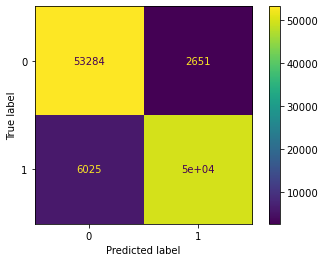

Text(0, 0.5, 'Sensibilite')

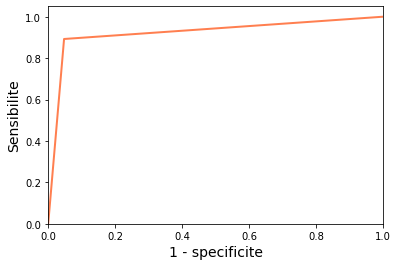

In [91]:
import xgboost as xgb

n_range = [100,250,500,750,1000]

lr_range = [0.1,0.5,1.0]

# grille de paramètres
param_grid = {'n_estimators': n_range , 'learning_rate' : lr_range}

XGBOOST = model_selection.GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring = "recall")

start_time = timeit.default_timer()

# Entraînement
XGBOOST.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(XGBOOST.best_params_)

# Prédiction sur le jeu de test
y_pred = XGBOOST.predict(X_test)

elapsed = timeit.default_timer() - start_time

# Evaluation
print( "Time : {:.2f}s".format(elapsed) )
print("Recall : {:.2f}".format(metrics.recall_score(y_test,y_pred)))
print("Précision : {:.2f}".format(metrics.precision_score(y_test,y_pred)))
print("Accuracy : {:.2f}".format(metrics.accuracy_score(y_test,y_pred)))
print("AUROC : {:.2f}".format(metrics.roc_auc_score(y_test,y_pred)))
CM = metrics.confusion_matrix(y_test, y_pred)
print("Faux Négatifs : {:.2f}".format(CM[1,0]))

# affichage de la matrice de confusion et de la courbe ROC  

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()
plt.show()

[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

## Prédictions

In [92]:
# on prépare nos données pour la prédiction

from sklearn import preprocessing

data_test.dropna(inplace=True)

X = data_test[variables_test].values      
colonnes = data_test[variables_test].columns
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)


In [93]:
# Prédictions
y_pred = XGBOOST.predict(X)

probas = XGBOOST.predict_proba(X)

In [94]:
data_test["Crédit_refusé"] = y_pred

data_test["Probabilité de défaut"] = probas[:,1]

In [95]:
print("Nombre de crédits acceptés : ",len(data_test[data_test["Crédit_refusé"]==0]["Crédit_refusé"]))

Nombre de crédits acceptés :  31


In [96]:
print("Nombre de crédits refusés : ",len(data_test[data_test["Crédit_refusé"]==1]["Crédit_refusé"]))

Nombre de crédits refusés :  33603


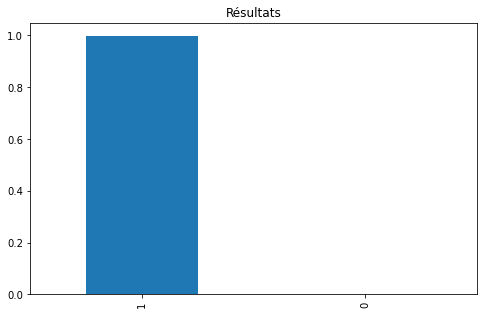

In [97]:
# on regarde le résultat

plt.figure(figsize=(8,5))
data_test["Crédit_refusé"].value_counts(normalize=True).plot(kind='bar',title='Résultats')
plt.show() 

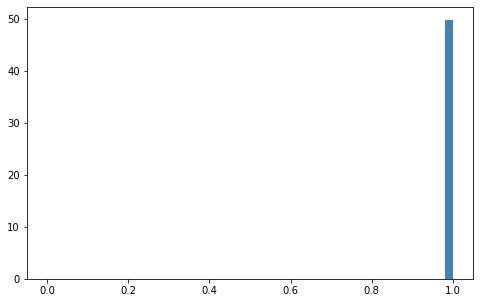

In [98]:
plt.figure(figsize=(8,5))
h = plt.hist(data_test["Probabilité de défaut"], bins=50, color='steelblue', density=True, edgecolor='none')
plt.show()

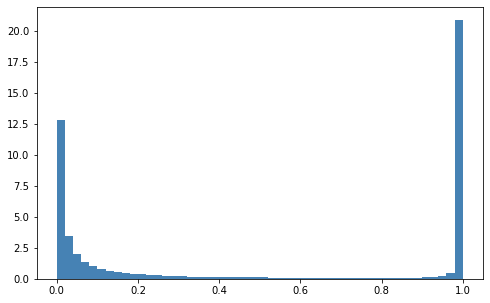

In [99]:
# je regarde comment étaients réparties les probas de défaut de paiement avec le set de test

probas_test = XGBOOST.predict_proba(X_test)

plt.figure(figsize=(8,5))
h = plt.hist(probas_test[:,1], bins=50, color='steelblue', density=True, edgecolor='none')
plt.show()

Il semblerait que sur le set de test (issu de data_train) lors de la phase de mise en place du modèle, l'algorithme XGBOOST fonctionne correctement. Le problème survient avec les données du set data_test

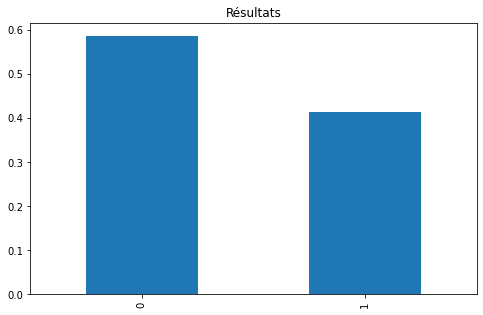

In [100]:
# on regarde les prédictions avec un autre modèle (SVM)

y_pred_SVM = SVC.predict(X)

data_test["SVM"] = y_pred_SVM

# on regarde le résultat

plt.figure(figsize=(8,5))
data_test["SVM"].value_counts(normalize=True).plot(kind='bar',title='Résultats')
plt.show()

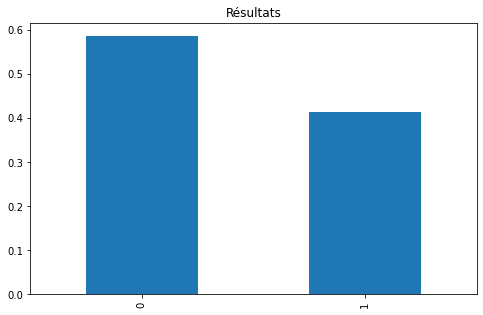

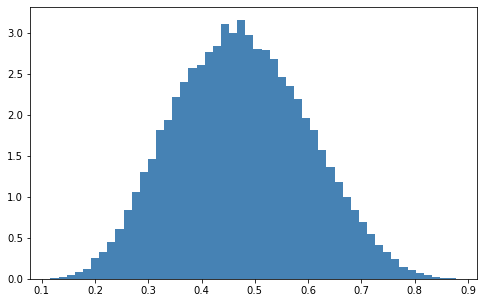

In [101]:
# on regarde les prédictions avec un autre modèle (régression logistique)

y_pred_LM = LM.predict(X)
probas_LM = LM.predict_proba(X)

data_test["LM"] = y_pred_LM

# on regarde le résultat

plt.figure(figsize=(8,5))
data_test["LM"].value_counts(normalize=True).plot(kind='bar',title='Résultats')
plt.show()

plt.figure(figsize=(8,5))
h = plt.hist(probas_LM[:,1], bins=50, color='steelblue', density=True, edgecolor='none')
plt.show()

Si le nombre de crédits refusés reste élevé avec ces deux visualisations, cela vient très probablement du fait que ces modèles sont peu efficaces.  

Cela montre que le problème ne vient pas du set de données data_test mais bien des prédictions XGBOOST sur ce set. 

Recall : 0.97
Précision : 1.00
Accuracy : 0.98
AUROC : 0.98
Faux Négatifs : 4110.00


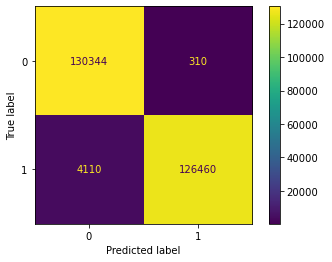

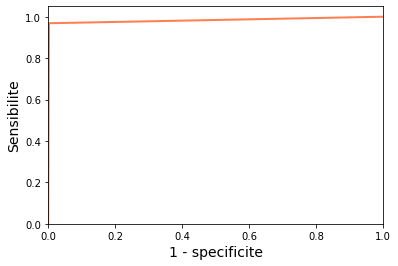

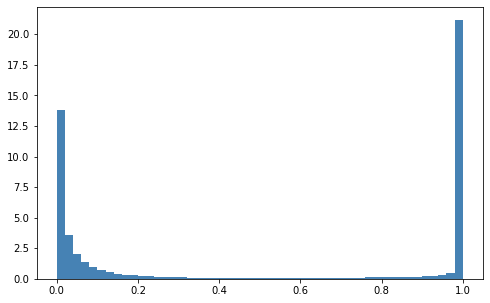

In [102]:
# on regarde les résultats sur des prédictions du set d'entrainement

# Prédictions
y_pred = XGBOOST.predict(X_train)

probas = XGBOOST.predict_proba(X_train)

print("Recall : {:.2f}".format(metrics.recall_score(y_train,y_pred)))
print("Précision : {:.2f}".format(metrics.precision_score(y_train,y_pred)))
print("Accuracy : {:.2f}".format(metrics.accuracy_score(y_train,y_pred)))
print("AUROC : {:.2f}".format(metrics.roc_auc_score(y_train,y_pred)))
CM = metrics.confusion_matrix(y_train, y_pred)
print("Faux Négatifs : {:.2f}".format(CM[1,0]))

# affichage de la matrice de confusion et de la courbe ROC  

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()
plt.show()

[fpr, tpr, thr] = metrics.roc_curve(y_train, y_pred)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

plt.figure(figsize=(8,5))
h = plt.hist(probas[:,1], bins=50, color='steelblue', density=True, edgecolor='none')
plt.show()

### 5e modèle :LightGBM

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'learning_rate': 0.5, 'n_estimators': 1000}
Time : 211.93s
Recall : 0.88
Précision : 0.96
Accuracy : 0.92
AUROC : 0.92
Faux Négatifs : 6552.00


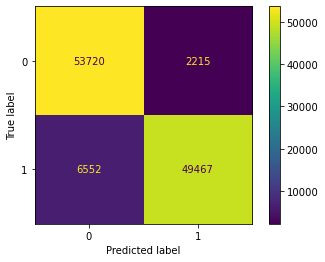

Text(0, 0.5, 'Sensibilite')

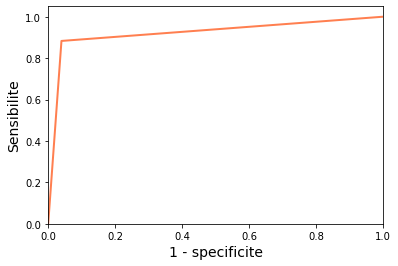

In [103]:
import lightgbm as lgb

n_range = [100,250,500,750,1000]

lr_range = [0.1,0.5,1.0]

# grille de paramètres
param_grid = {'n_estimators': n_range , 'learning_rate' : lr_range}

LGBMC = model_selection.GridSearchCV(lgb.LGBMClassifier(), param_grid, cv=5, scoring = "recall")

start_time = timeit.default_timer()

# Entraînement
LGBMC.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(LGBMC.best_params_)

# Prédiction sur le jeu de test
y_pred = LGBMC.predict(X_test)

elapsed = timeit.default_timer() - start_time

# Evaluation
print( "Time : {:.2f}s".format(elapsed) )
print("Recall : {:.2f}".format(metrics.recall_score(y_test,y_pred)))
print("Précision : {:.2f}".format(metrics.precision_score(y_test,y_pred)))
print("Accuracy : {:.2f}".format(metrics.accuracy_score(y_test,y_pred)))
print("AUROC : {:.2f}".format(metrics.roc_auc_score(y_test,y_pred)))
CM = metrics.confusion_matrix(y_test, y_pred)
print("Faux Négatifs : {:.2f}".format(CM[1,0]))

# affichage de la matrice de confusion et de la courbe ROC  

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()
plt.show()

[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

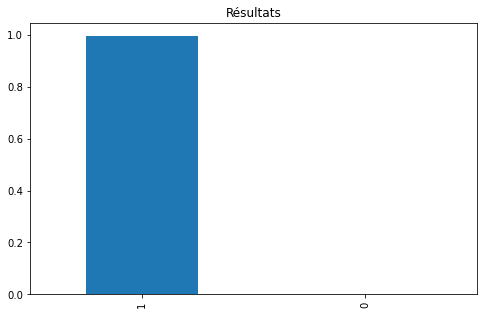

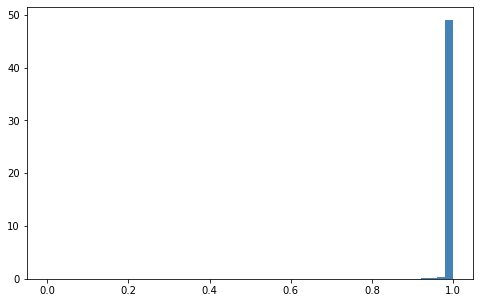

In [104]:
# on regarde les prédictions de ce modèle

y_pred = LGBMC.predict(X)
probas = LGBMC.predict_proba(X)

data_test["LGBMC"] = y_pred

# on regarde le résultat

plt.figure(figsize=(8,5))
data_test["LGBMC"].value_counts(normalize=True).plot(kind='bar',title='Résultats')
plt.show()

plt.figure(figsize=(8,5))
h = plt.hist(probas[:,1], bins=50, color='steelblue', density=True, edgecolor='none')
plt.show()

**Si les modèles XGBOOST et LightGBM sont performants sur le set Train, ils ne se généralisent pas bien et offrent un résultat inexploitable sur le set Test.**  

**Ainsi, le modèle choisi est la régression logistique d'hyperparamètres {'C': 0.001, 'penalty': 'l2'}, moins performante mais au résultat exploitable et généralisable.**

In [105]:
# exportation du modèle

import joblib

joblib.dump(LM, 'P7_model.pkl')

['P7_model.pkl']

# Création des échantillons pour l'application en ligne

Github ne permet pas d'importer des fichiers volumineux. Ainsi, on va conserver uniquement une partie des données.

In [3]:
# on charge les données brutes

appli_test = pd.read_csv('application_test.csv', sep = ',')

appli_train = pd.read_csv('application_train.csv', sep = ',')

bureau = pd.read_csv('bureau.csv', sep = ',')

credit_card = pd.read_csv('credit_card_balance.csv', sep = ',')

installments = pd.read_csv('installments_payments.csv', sep = ',')

POS = pd.read_csv('POS_CASH_balance.csv', sep = ',')

previous_appli = pd.read_csv('previous_application.csv', sep = ',')


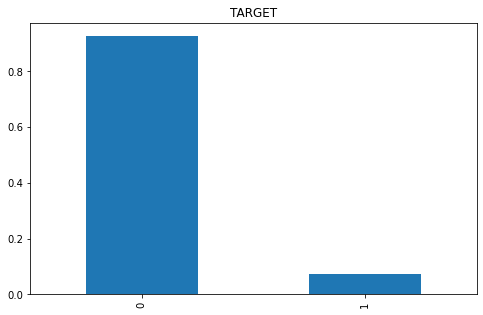

In [9]:
# on choisit un sample des données test et train

appli_test = appli_test.sample(n=1000, replace = True)

appli_train = appli_train.sample(n=1000, replace = True)

# on vérifie la répartition de la target dans les données train

plt.figure(figsize=(8,5))
appli_train['TARGET'].value_counts(normalize=True).plot(kind='bar',title='TARGET')
plt.show() 

In [15]:
# maintenant, on extrait des autres données les lignes contenant l'identifiant SK_ID_CURR:

identifiants = appli_train["SK_ID_CURR"].unique().tolist() + appli_test["SK_ID_CURR"].unique().tolist()

In [27]:
# on conserve dans les autres dataframes uniquement les lignes dont la variable SK_ID_CURR se trouve dans la liste identifiants

bureau = bureau[bureau["SK_ID_CURR"].isin(identifiants)]

credit_card = credit_card[credit_card["SK_ID_CURR"].isin(identifiants)]

installments = installments[installments["SK_ID_CURR"].isin(identifiants)]

POS = POS[POS["SK_ID_CURR"].isin(identifiants)]

previous_appli = previous_appli[previous_appli["SK_ID_CURR"].isin(identifiants)]

In [32]:
#on effectue un reset des index de nos dataframes

appli_train.reset_index(inplace = True)
appli_test.reset_index(inplace = True)
bureau.reset_index(inplace = True)
credit_card.reset_index(inplace = True)
installments.reset_index(inplace = True)
POS.reset_index(inplace = True)
previous_appli.reset_index(inplace = True)

In [35]:
# enfin, on enregistre nos échantillons en csv

appli_test.to_csv('P7_échantillons/application_test.csv', sep = ',')

appli_train.to_csv('P7_échantillons/application_train.csv', sep = ',')

bureau.to_csv('P7_échantillons/bureau.csv', sep = ',')

credit_card.to_csv('P7_échantillons/credit_card_balance.csv', sep = ',')

installments.to_csv('P7_échantillons/installments_payments.csv', sep = ',')

POS.to_csv('P7_échantillons/POS_CASH_balance.csv', sep = ',')

previous_appli.to_csv('P7_échantillons/previous_application.csv', sep = ',')


Remarques : ces fichiers csv seront déplacés vers le sous-dossier "P7_data" du dossier "appli" dans le dépôt GitHub. 